In [49]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import matplotlib.pyplot as plt

In [50]:
class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 256),
            nn.LeakyReLU(0.1),
            nn.Linear(256, img_dim),
            nn.LeakyReLU(0.1),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.gen(x)

In [51]:
class Discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features, 128),
            nn.LeakyReLU(0.1),
            nn.Linear(128,1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.disc(x)

In [52]:
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 1e-4
z_dim = 64
image_dim = 28*28*1
batch_size = 128
num_epochs = 100

In [53]:
device

'cuda'

In [54]:
disc = Discriminator(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)
fixed_noise = torch.randn((batch_size, z_dim)).to(device)
transforms = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
)


In [55]:
dataset = datasets.MNIST(root="dataset/", transform = transforms, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [56]:
opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()

Epoch [1/100]
Loss D 0.1994
Loss G 1.3125


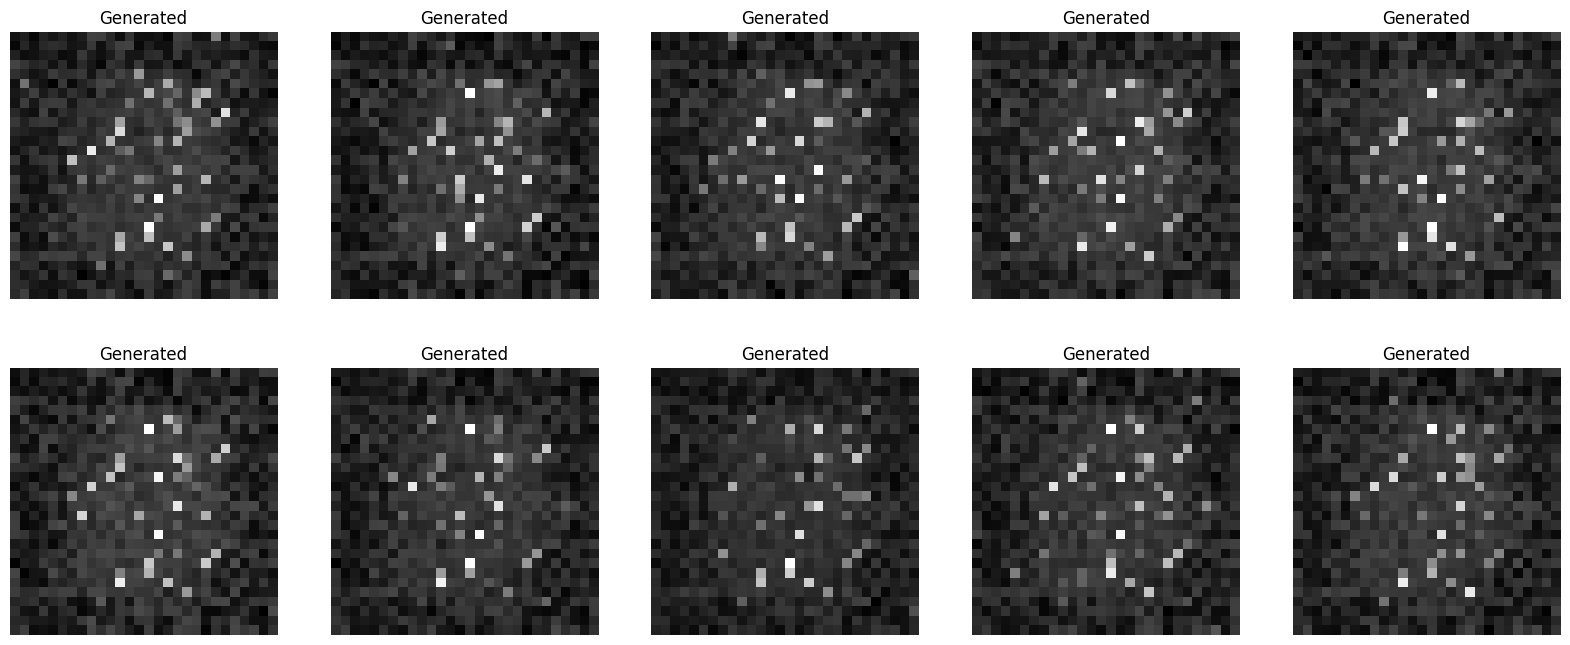

Epoch [2/100]
Loss D 0.1468
Loss G 1.7694


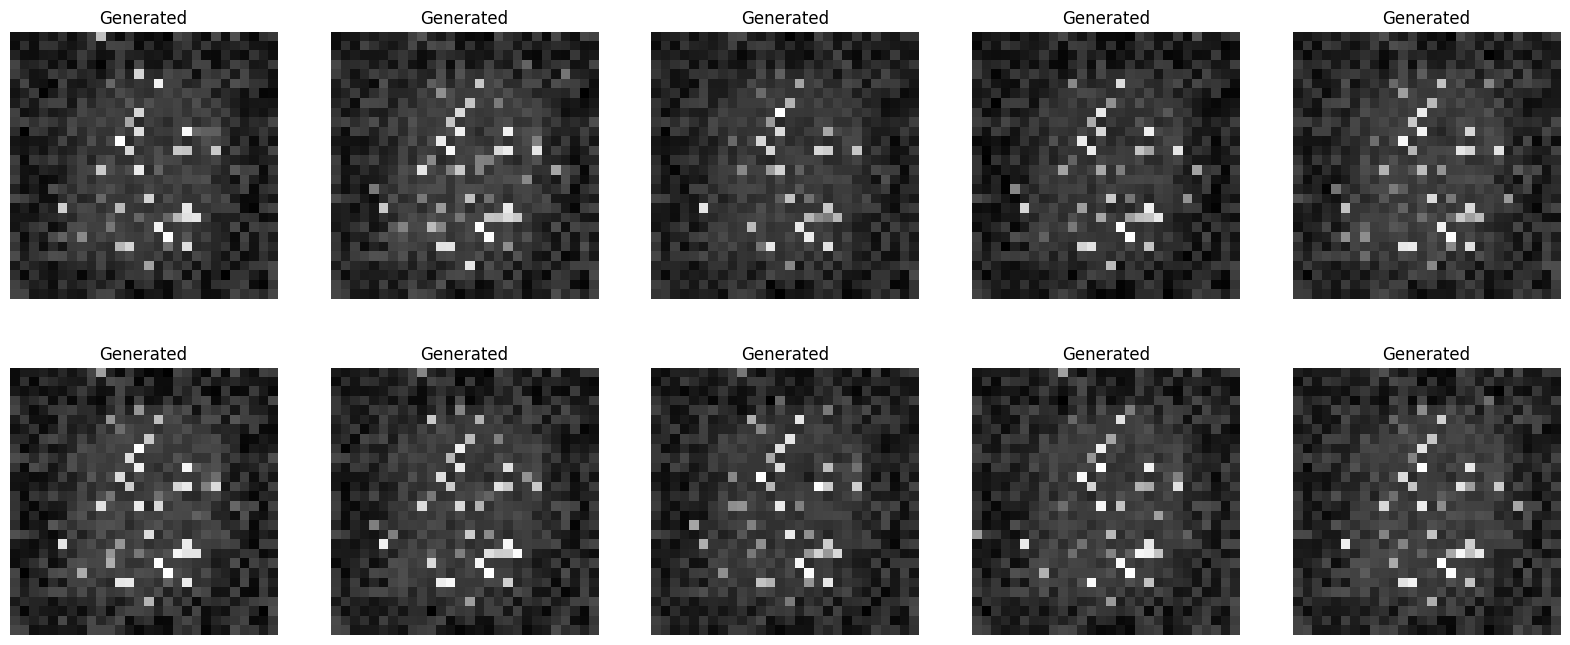

Epoch [3/100]
Loss D 0.0703
Loss G 2.3244


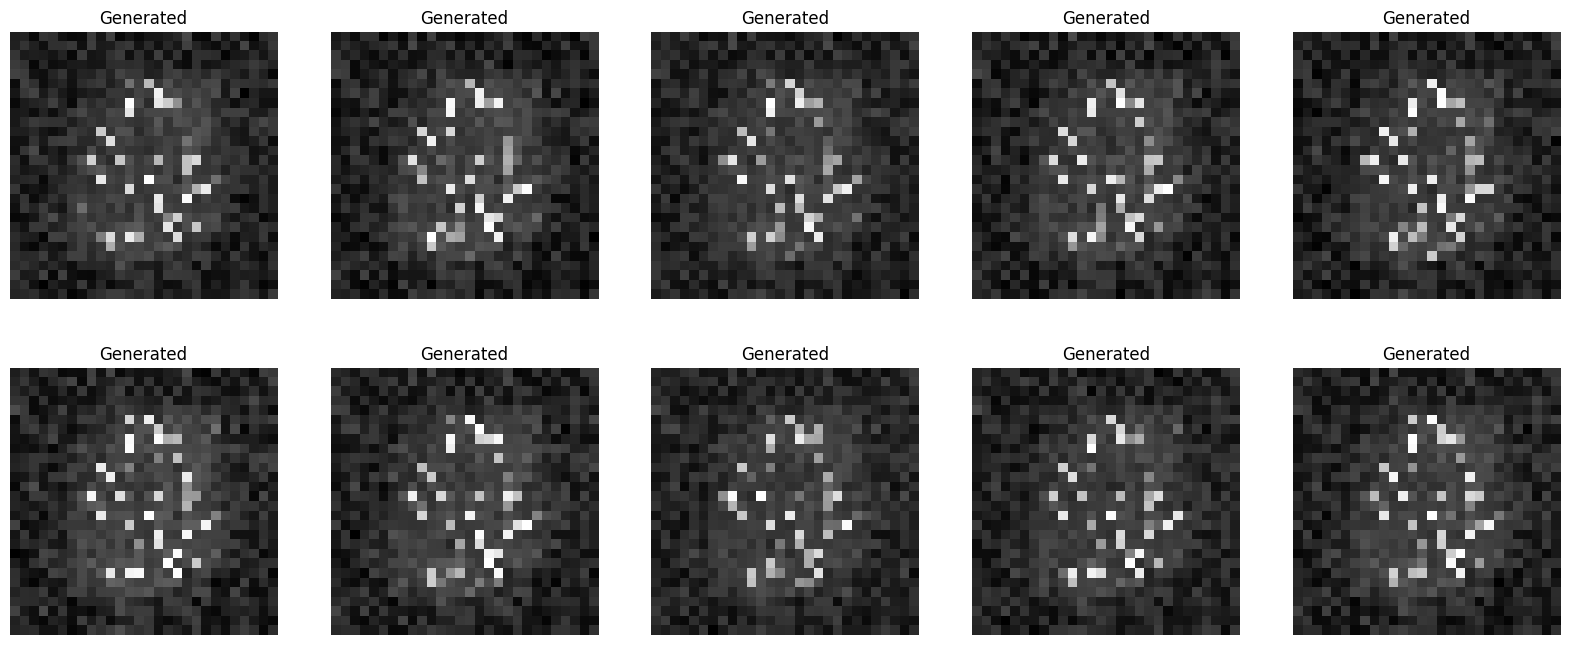

Epoch [4/100]
Loss D 0.1254
Loss G 2.0717


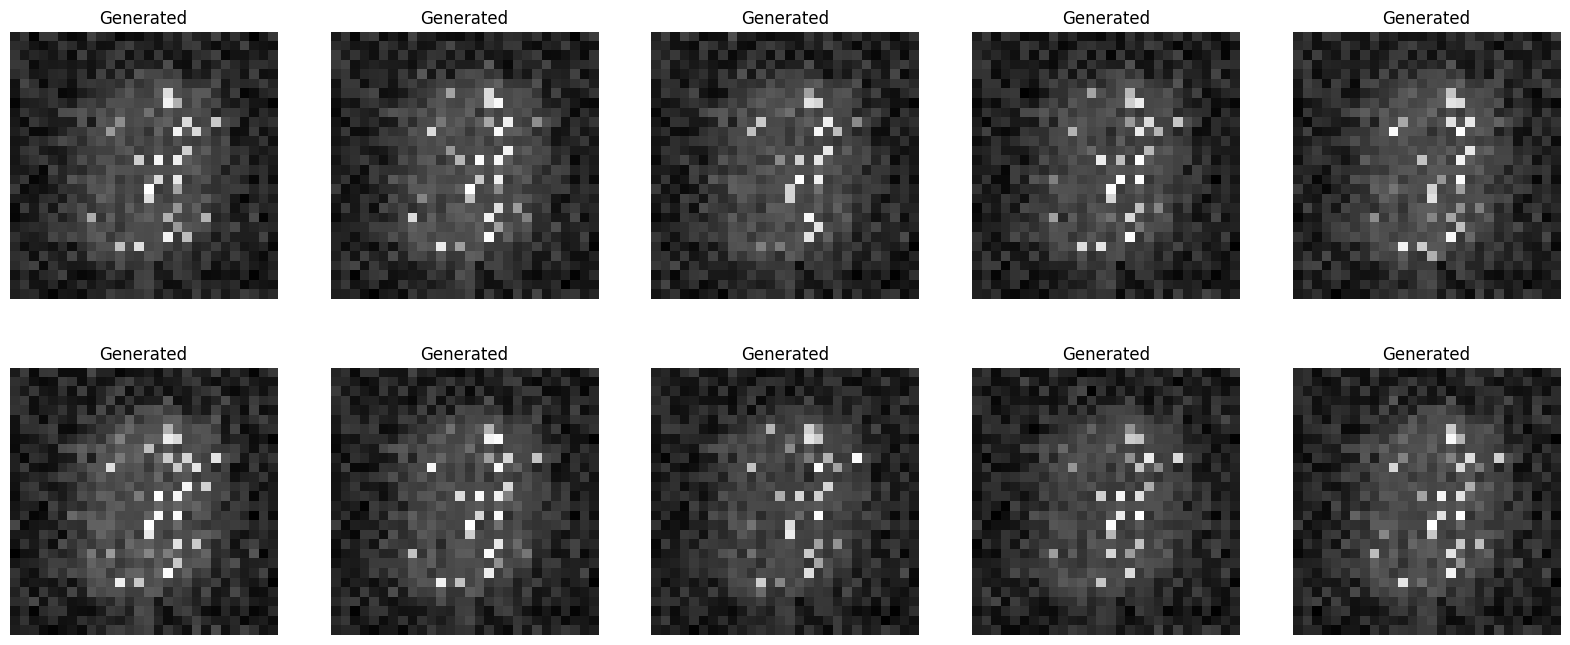

Epoch [5/100]
Loss D 0.1117
Loss G 2.3911


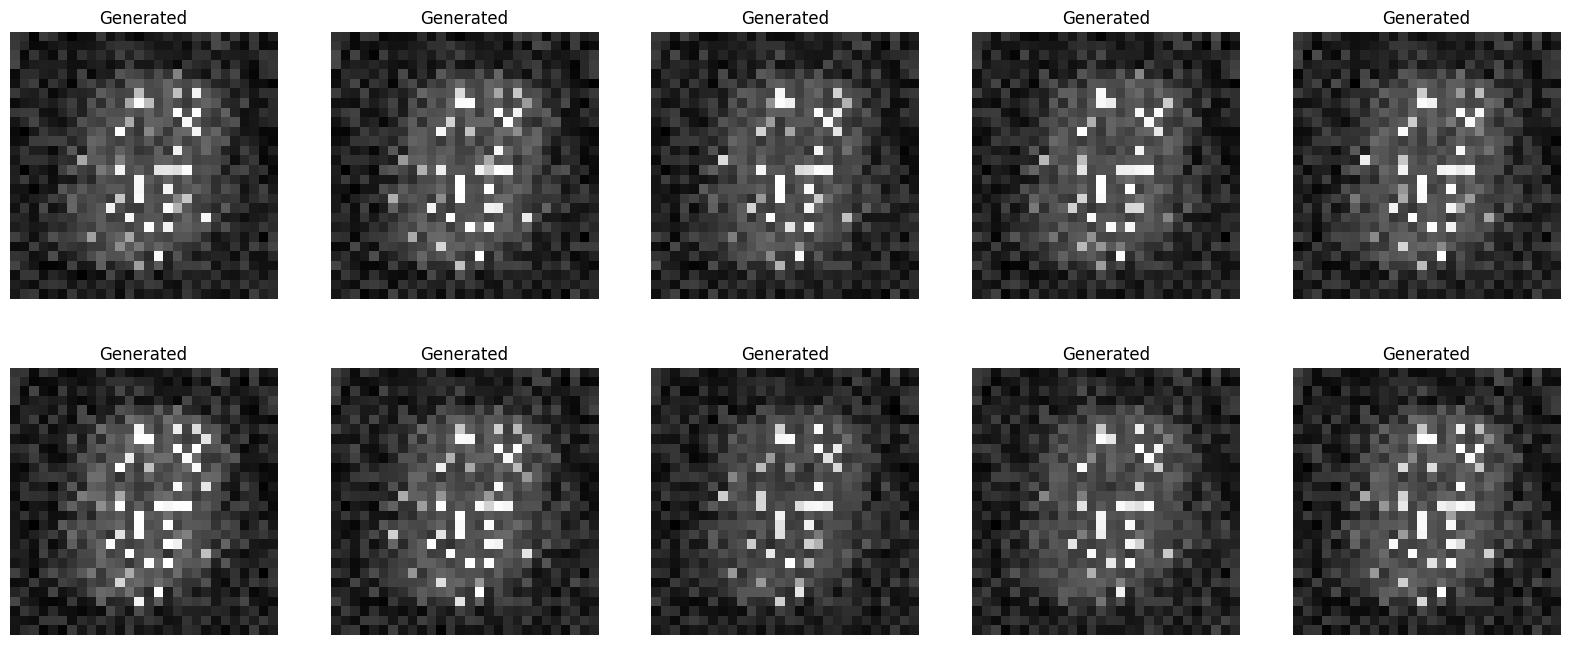

Epoch [6/100]
Loss D 0.0961
Loss G 2.8482


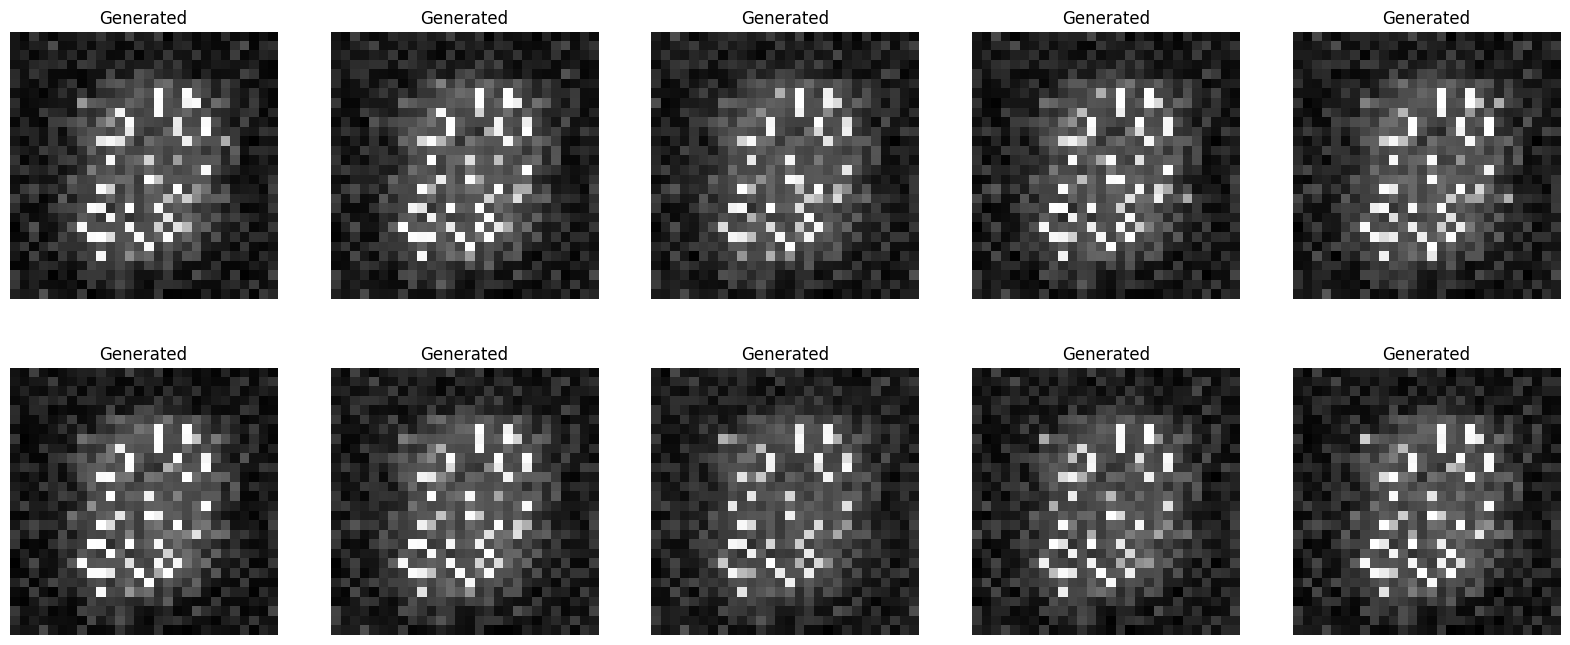

Epoch [7/100]
Loss D 0.0863
Loss G 2.9865


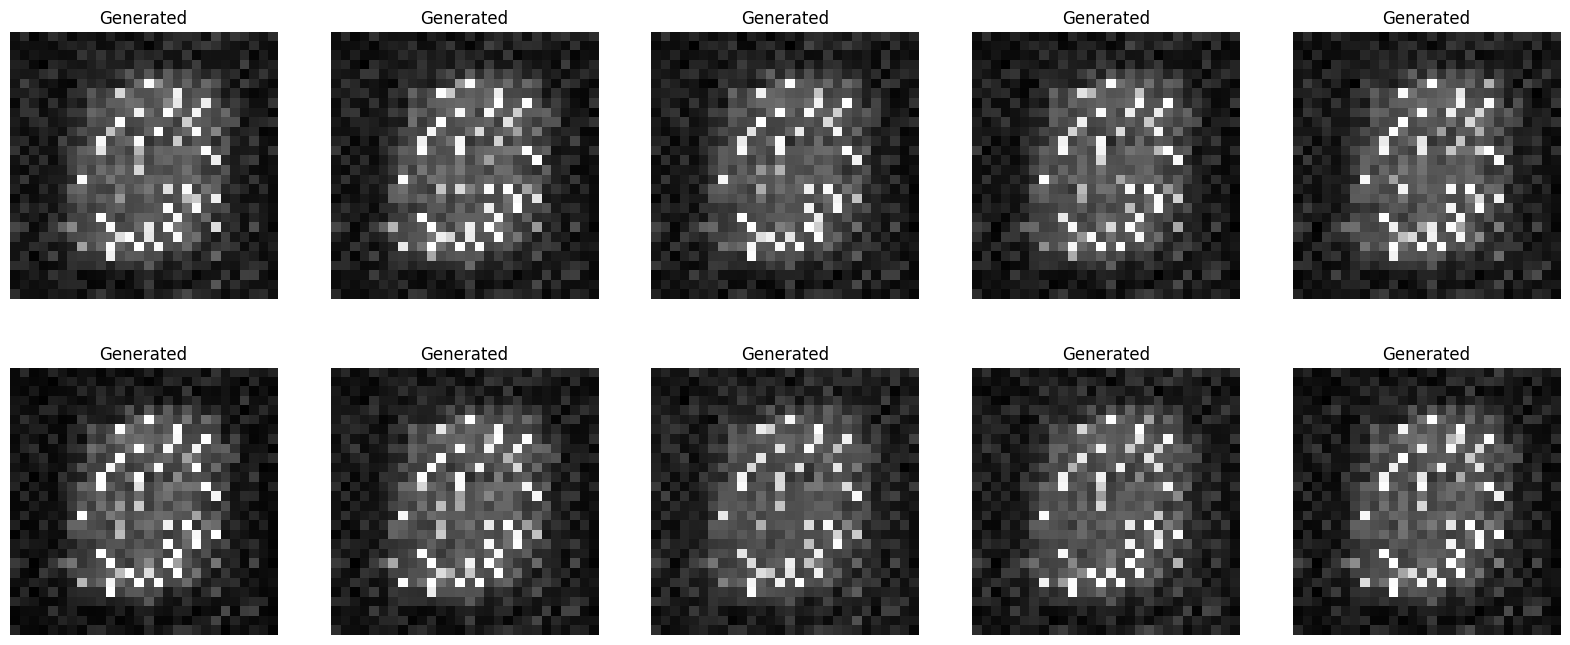

Epoch [8/100]
Loss D 0.0762
Loss G 3.1010


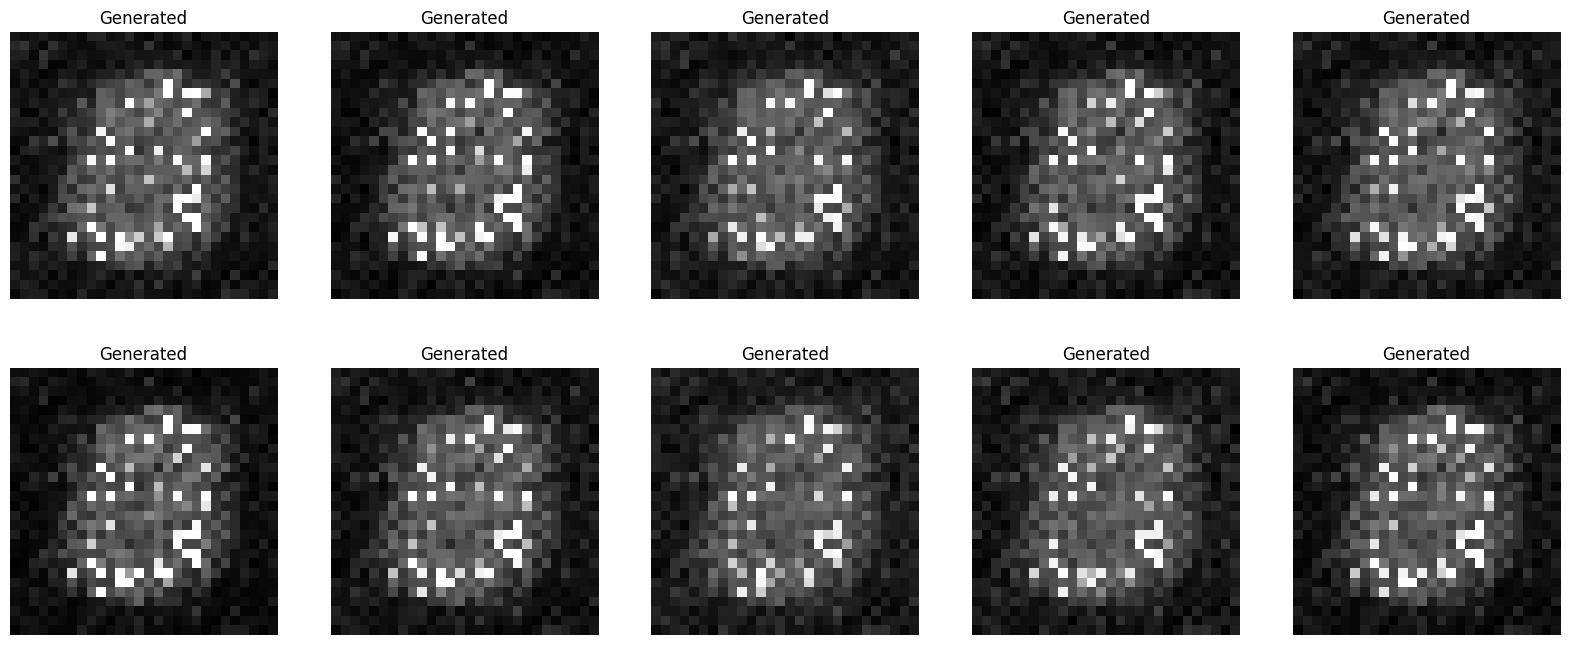

Epoch [9/100]
Loss D 0.0731
Loss G 2.8252


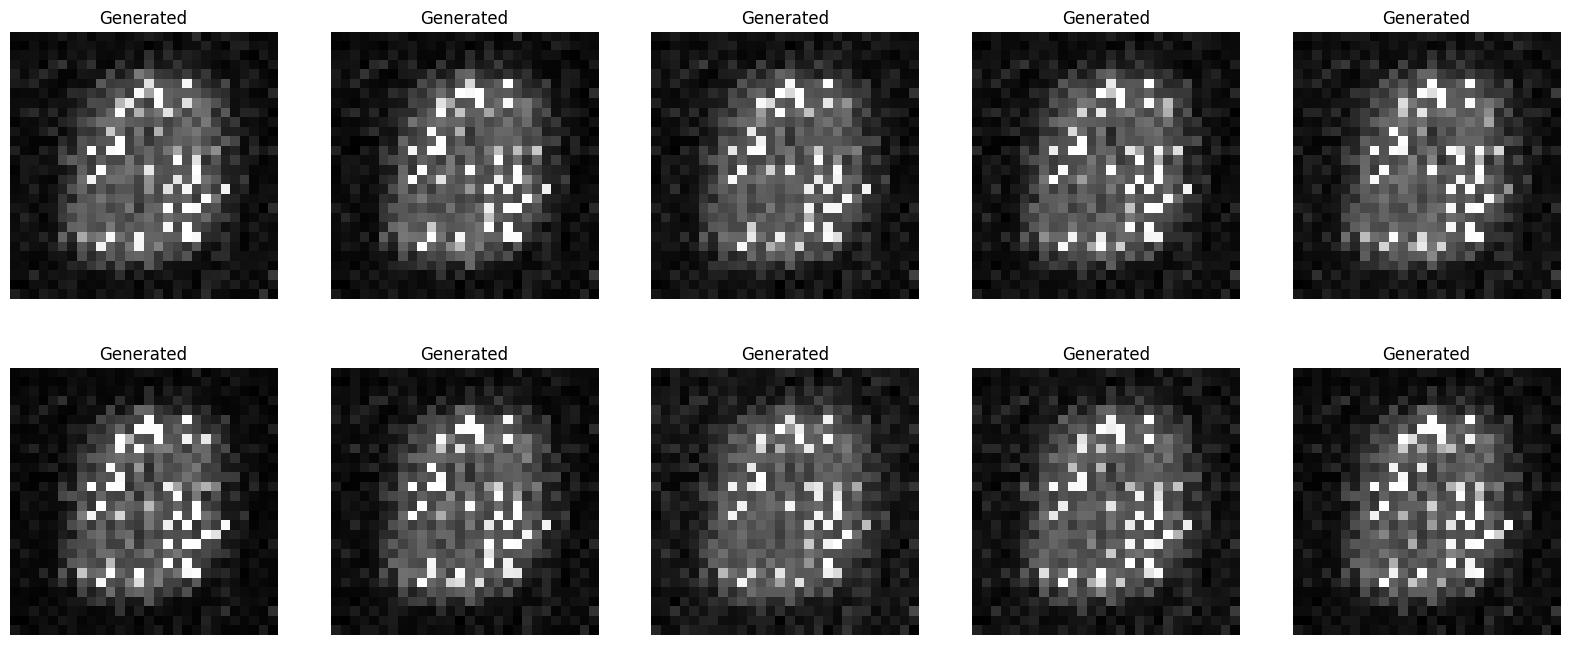

Epoch [10/100]
Loss D 0.0871
Loss G 2.9683


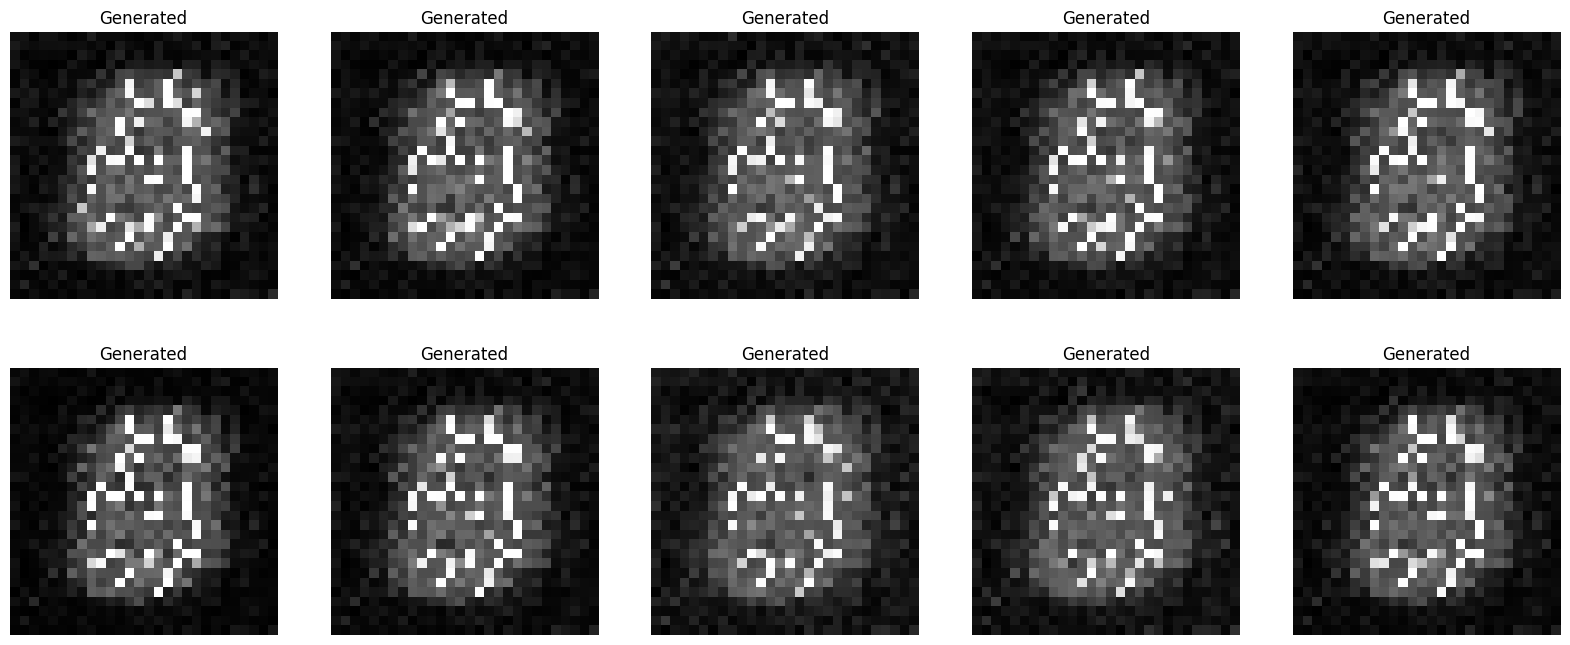

Epoch [11/100]
Loss D 0.0696
Loss G 3.1553


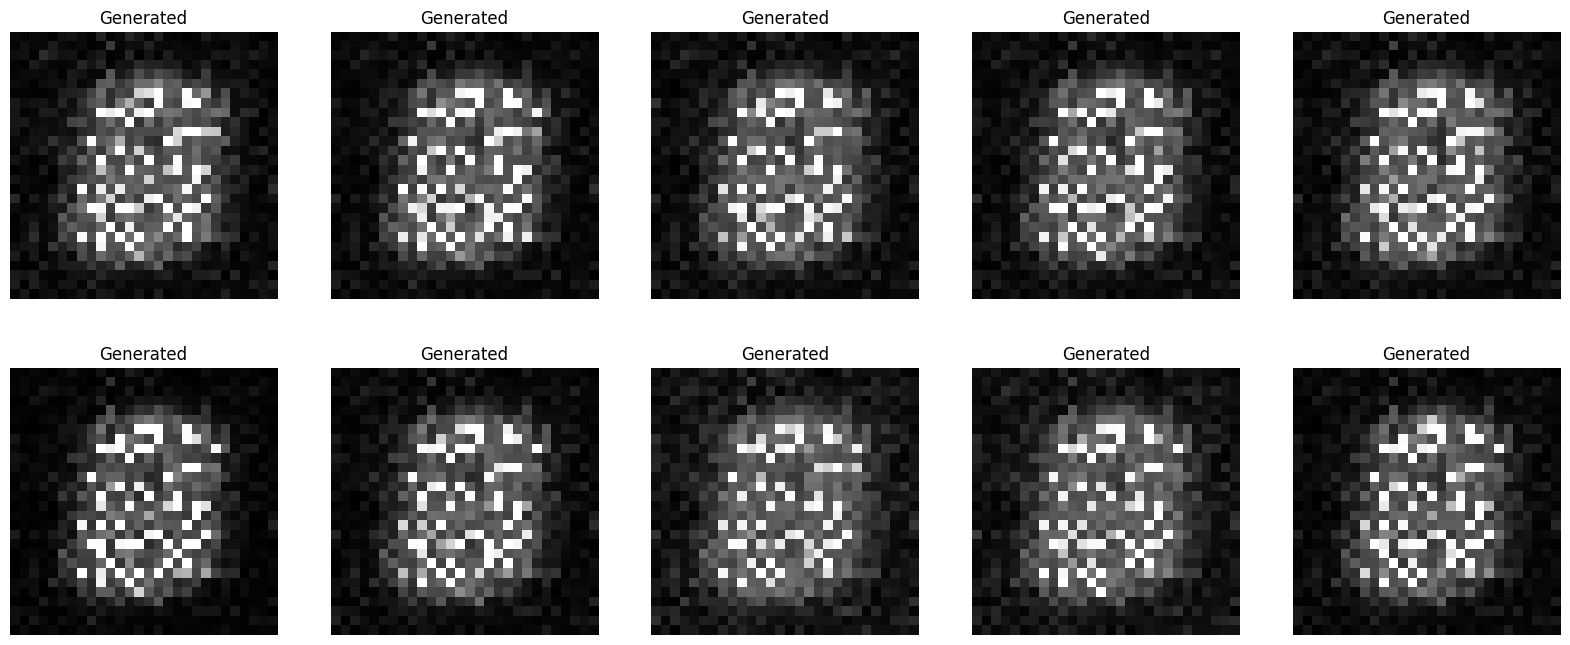

Epoch [12/100]
Loss D 0.0868
Loss G 3.3355


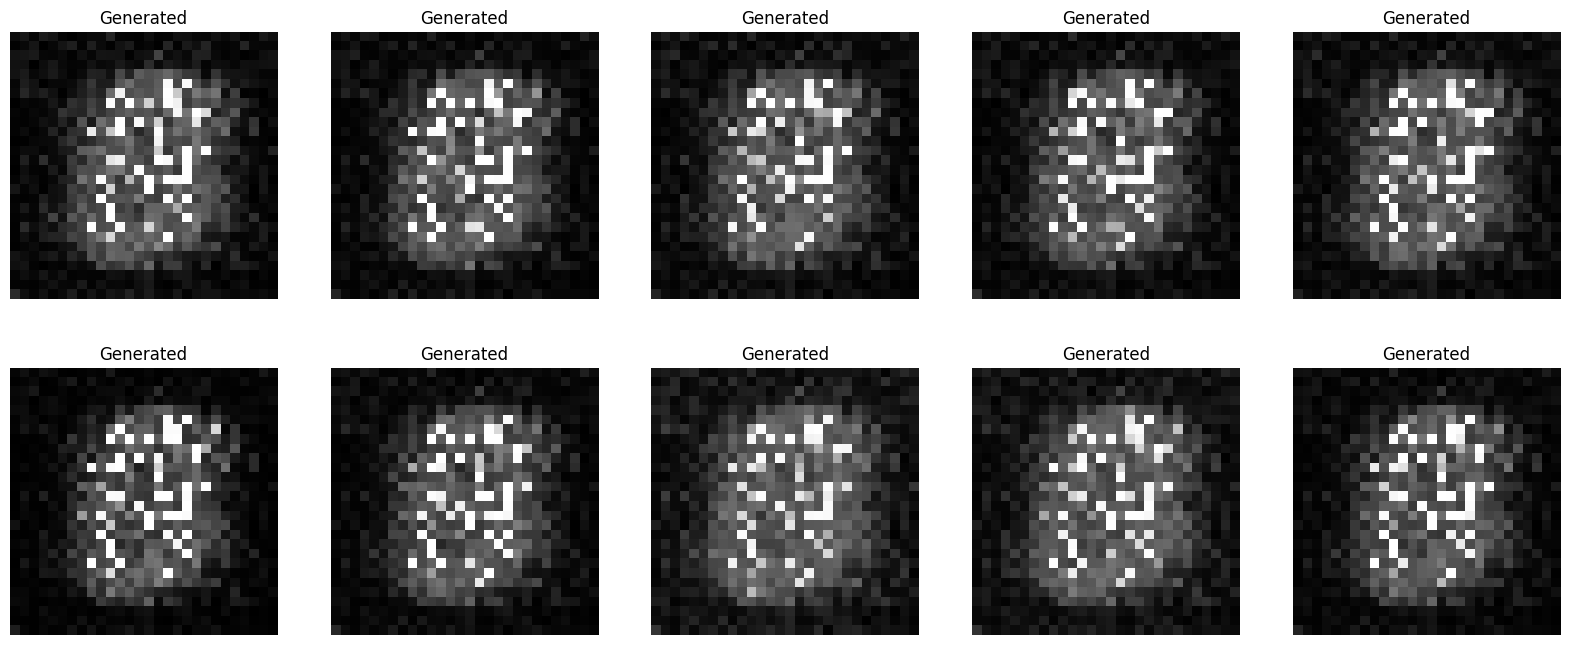

Epoch [13/100]
Loss D 0.0985
Loss G 3.2747


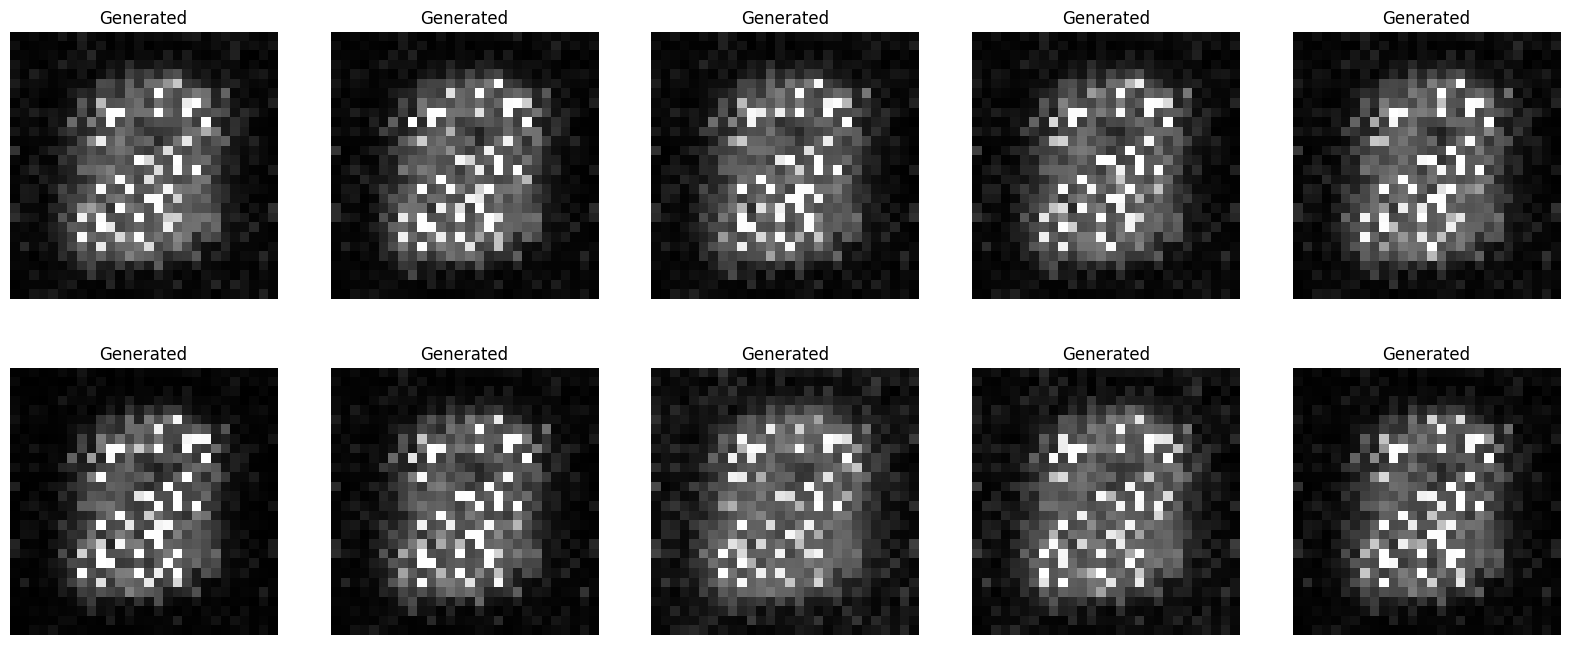

Epoch [14/100]
Loss D 0.1313
Loss G 2.6405


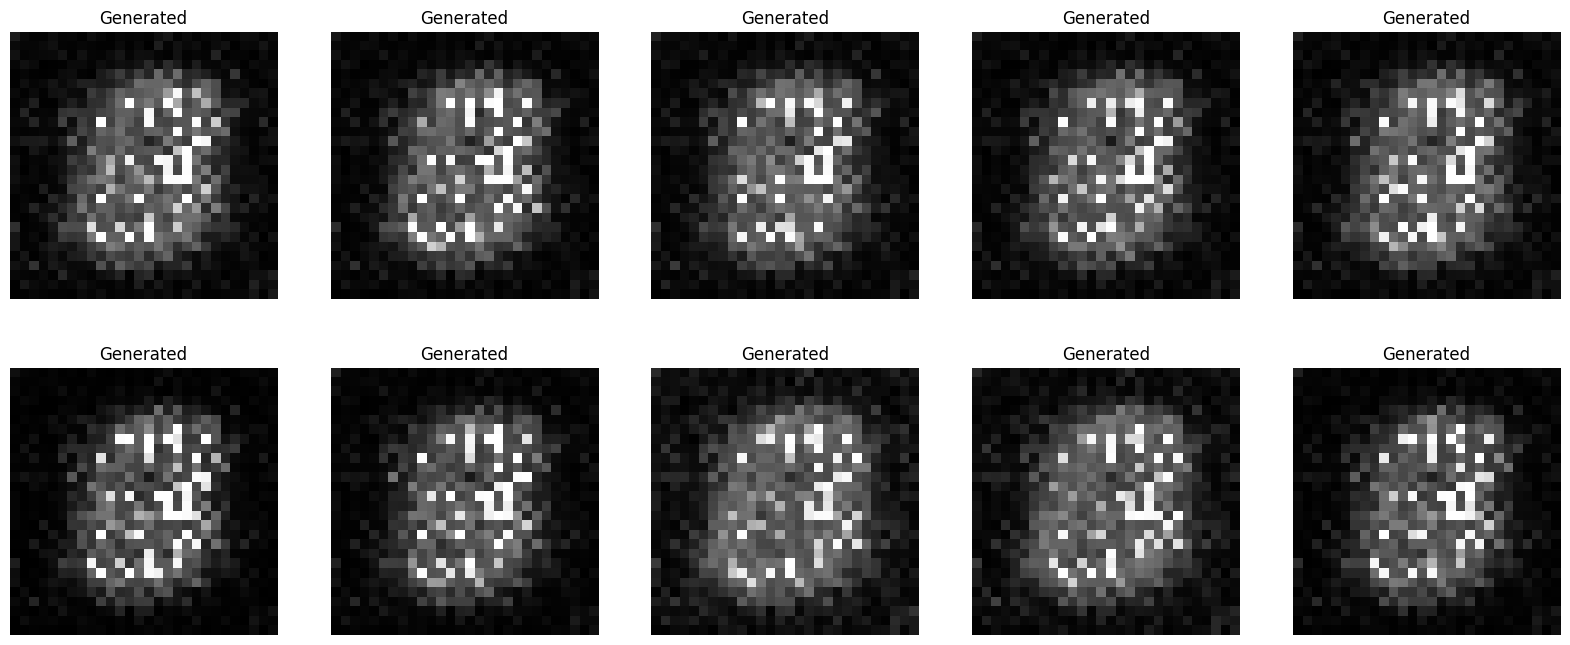

Epoch [15/100]
Loss D 0.1605
Loss G 2.6673


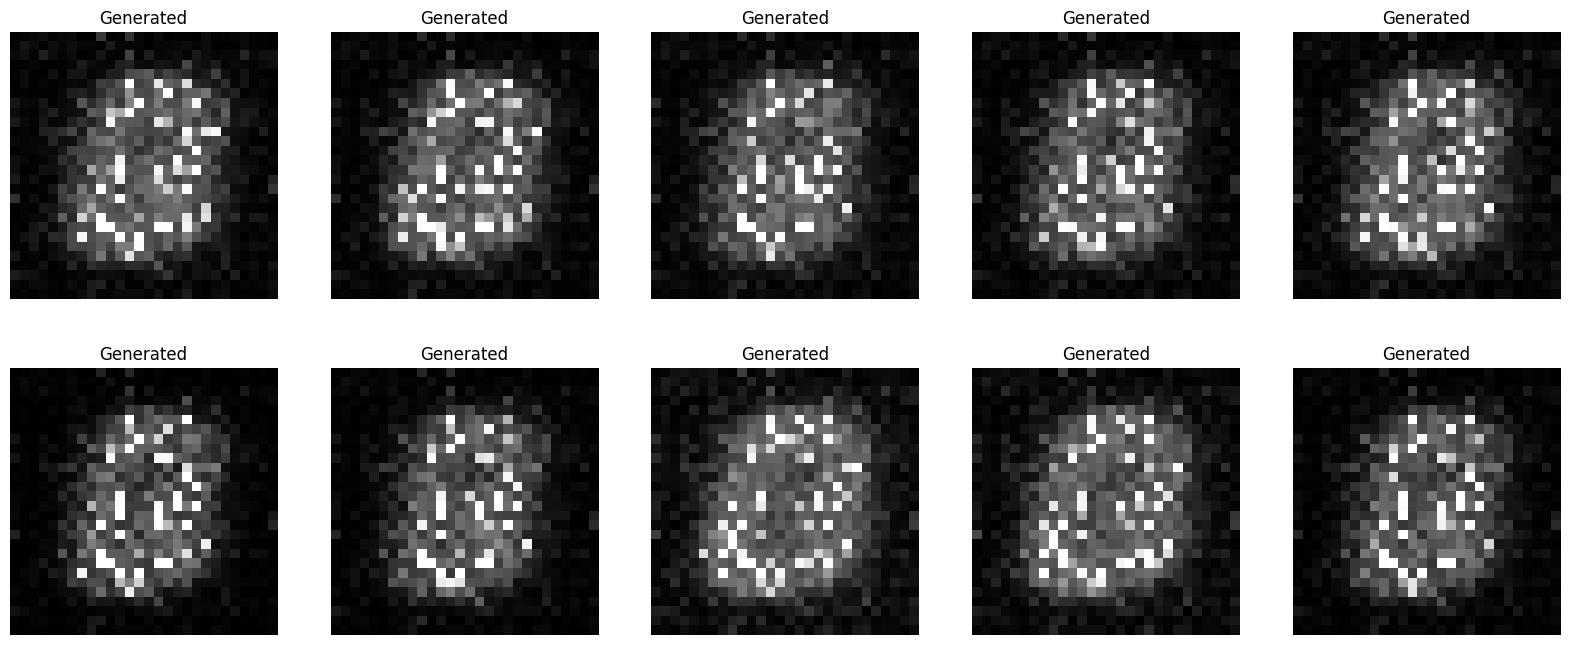

Epoch [16/100]
Loss D 0.1507
Loss G 2.3507


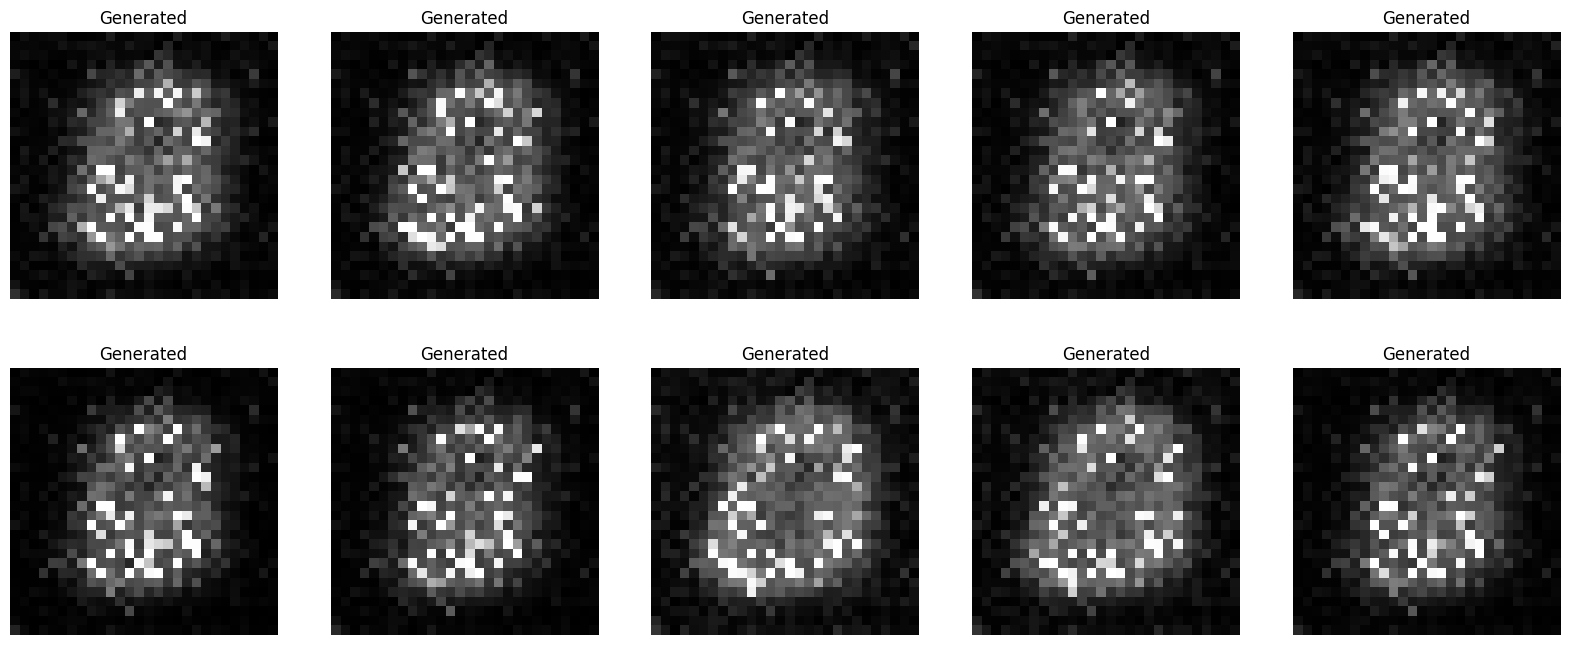

Epoch [17/100]
Loss D 0.1440
Loss G 2.7394


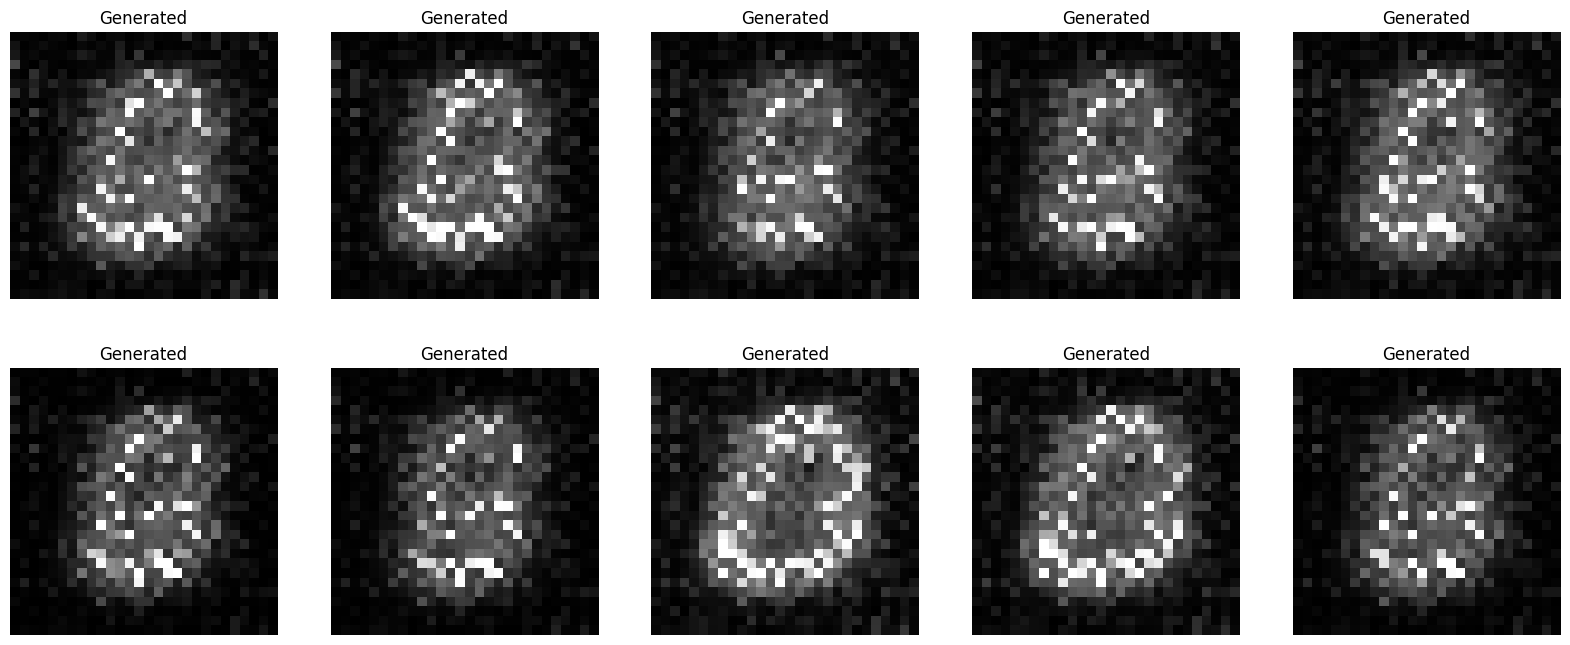

Epoch [18/100]
Loss D 0.1300
Loss G 2.7716


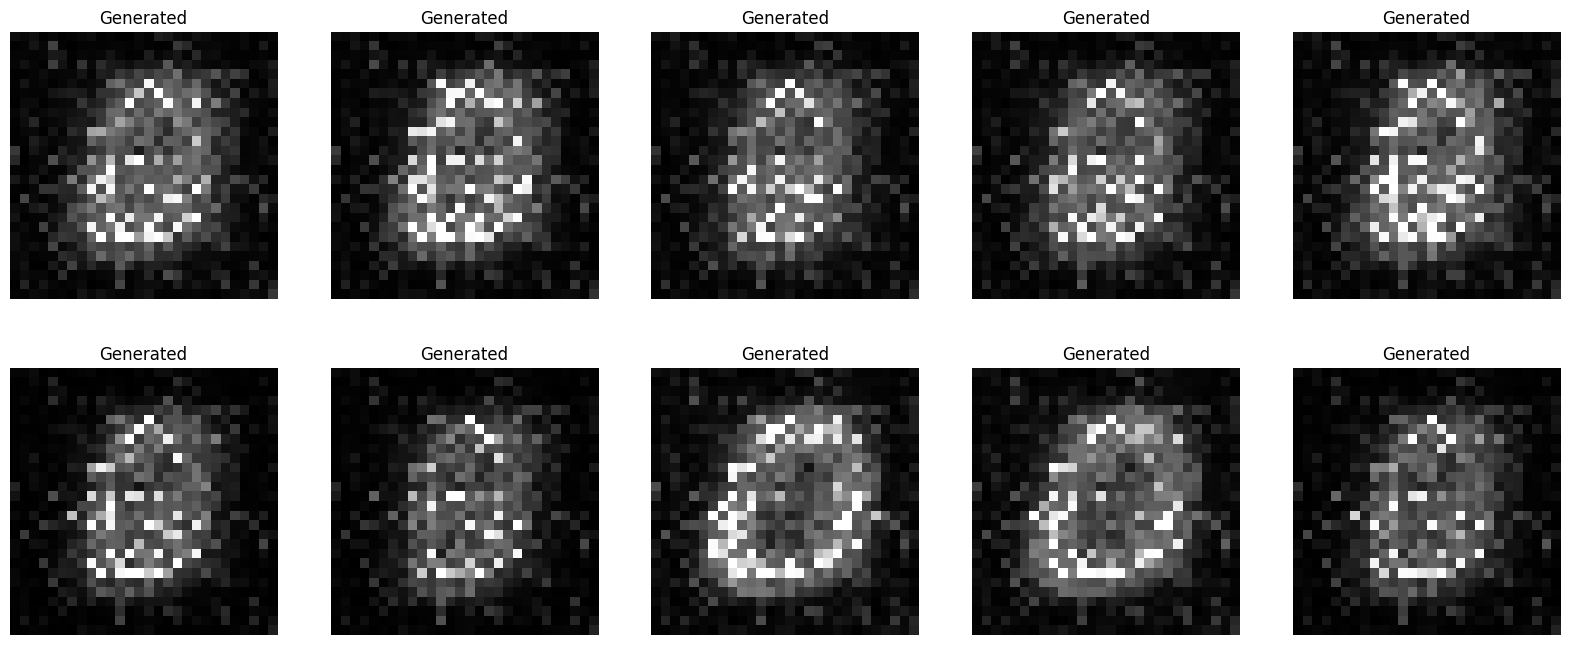

Epoch [19/100]
Loss D 0.1342
Loss G 2.8877


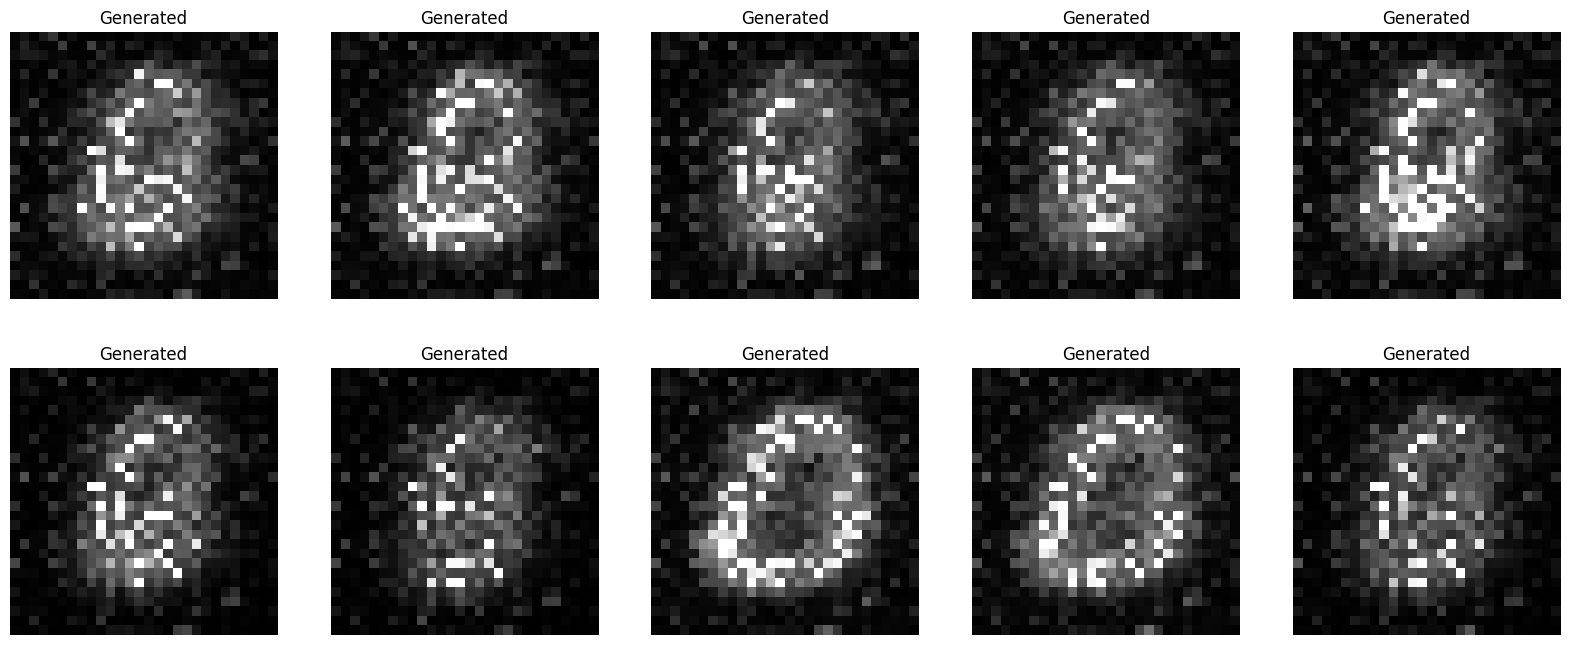

Epoch [20/100]
Loss D 0.1101
Loss G 2.8330


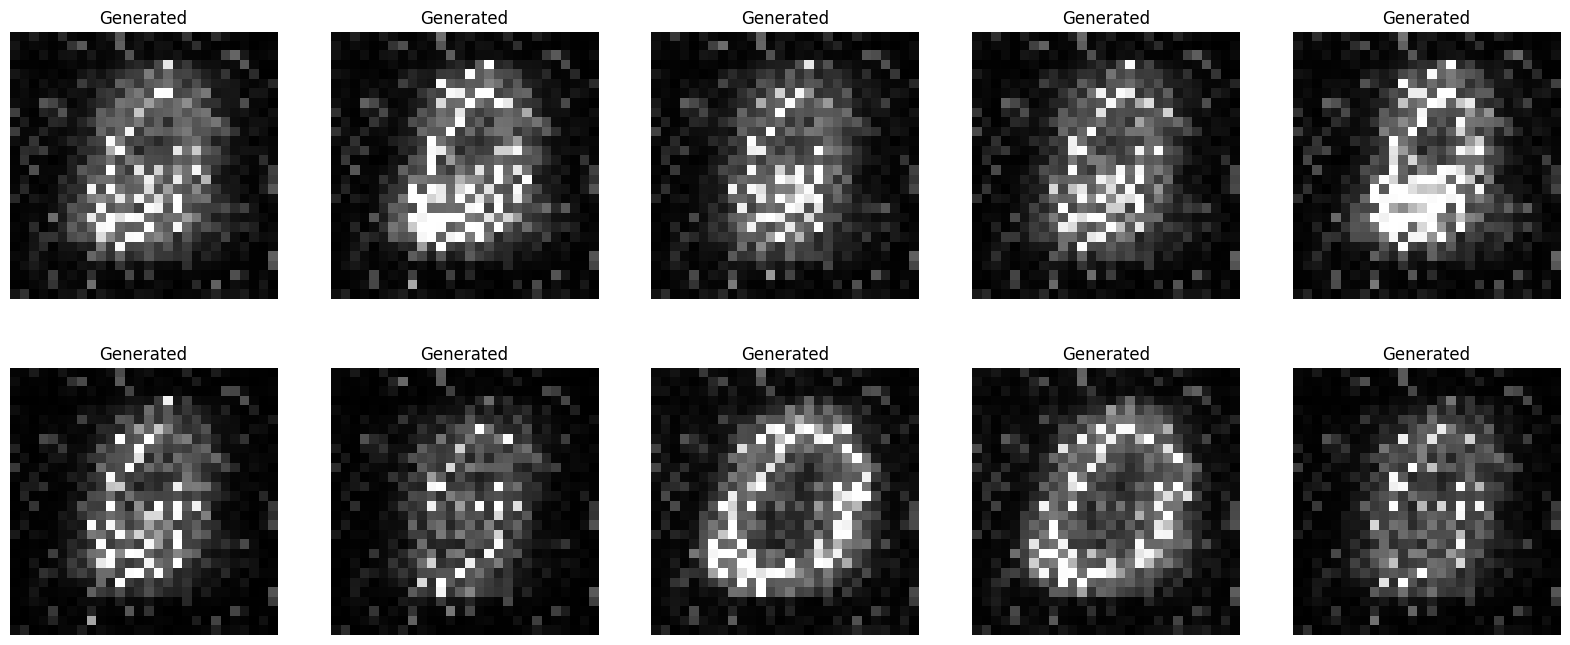

Epoch [21/100]
Loss D 0.0945
Loss G 3.2539


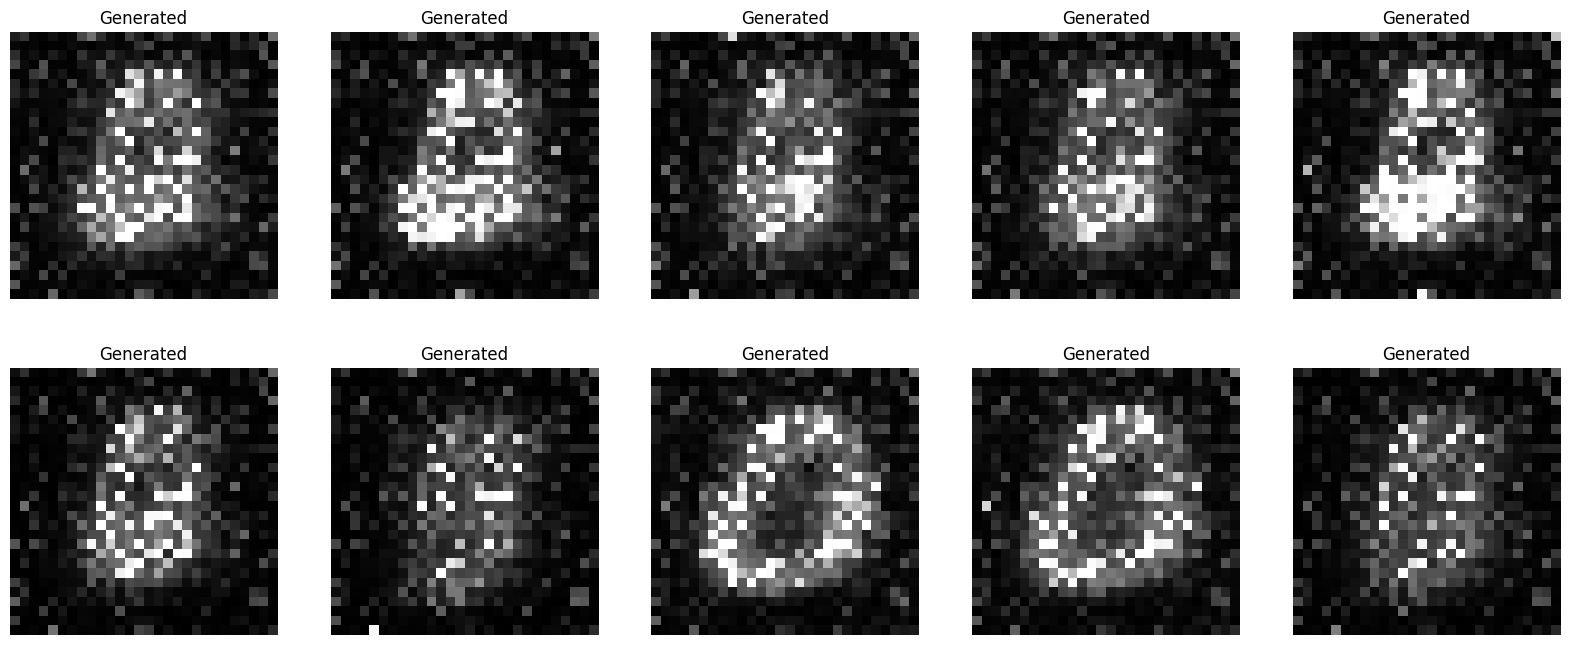

Epoch [22/100]
Loss D 0.0429
Loss G 3.7207


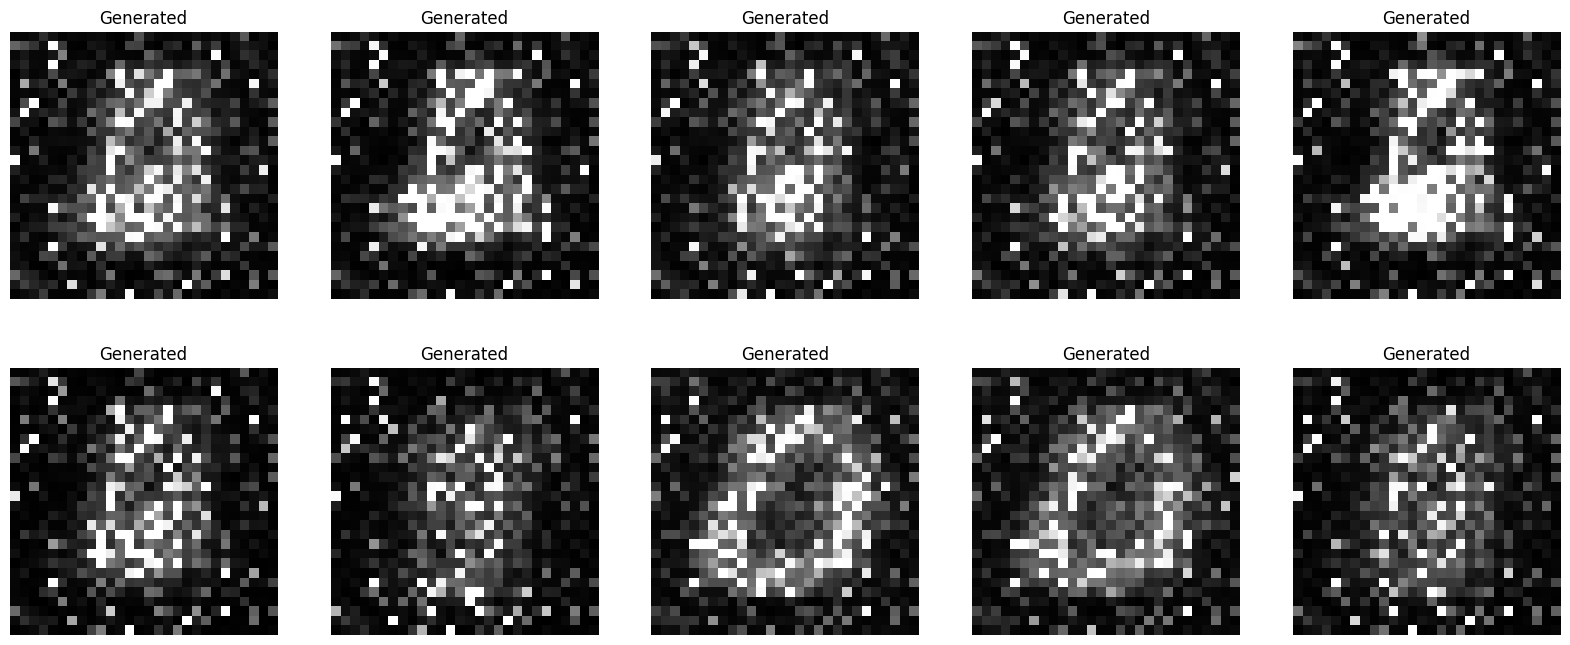

Epoch [23/100]
Loss D 0.0147
Loss G 4.9749


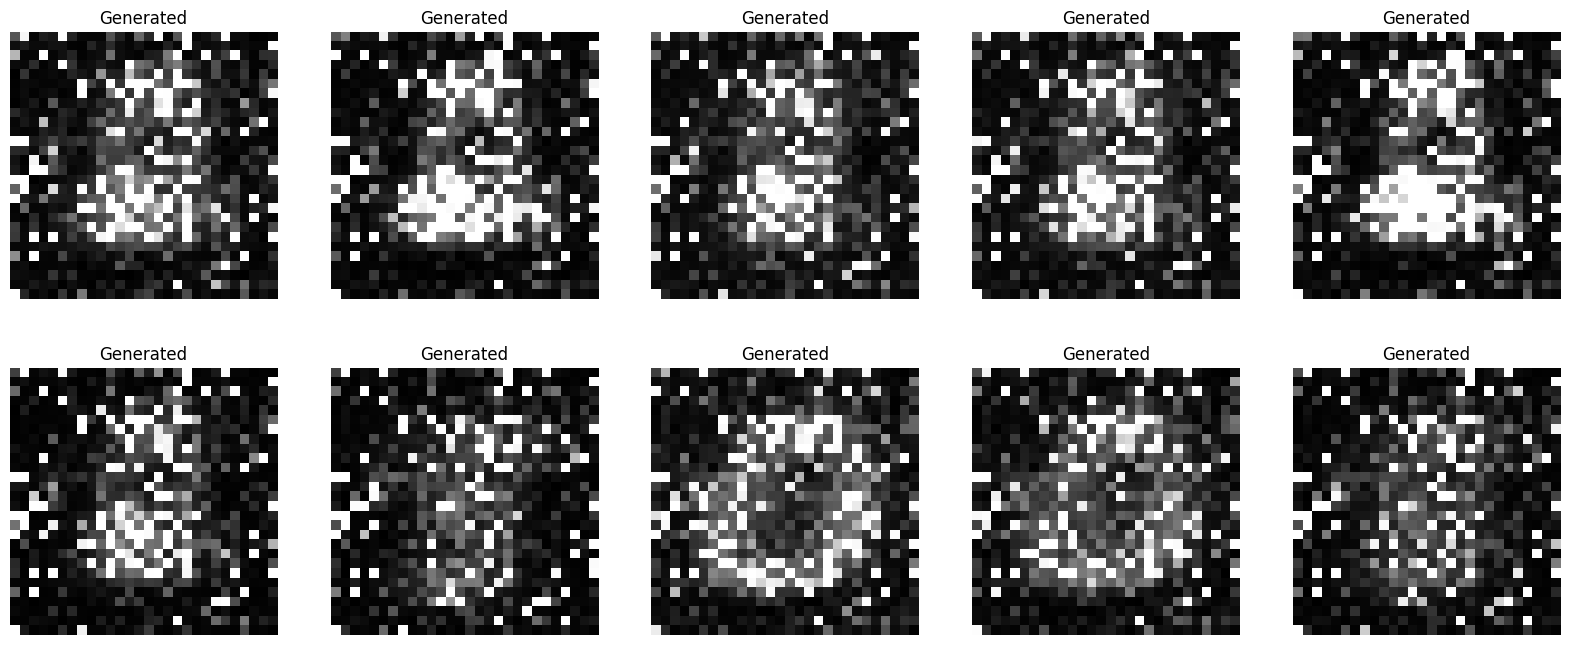

Epoch [24/100]
Loss D 0.0097
Loss G 5.7284


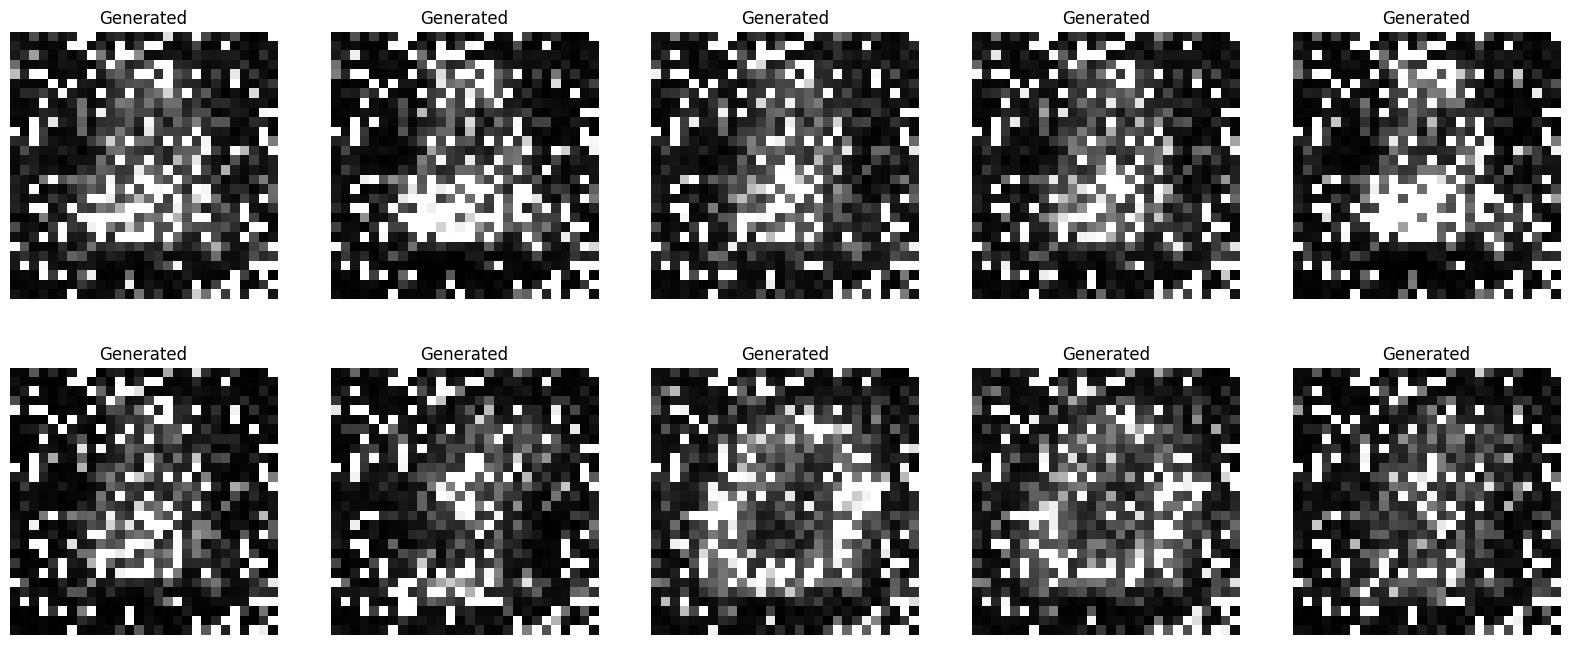

Epoch [25/100]
Loss D 0.0074
Loss G 6.3139


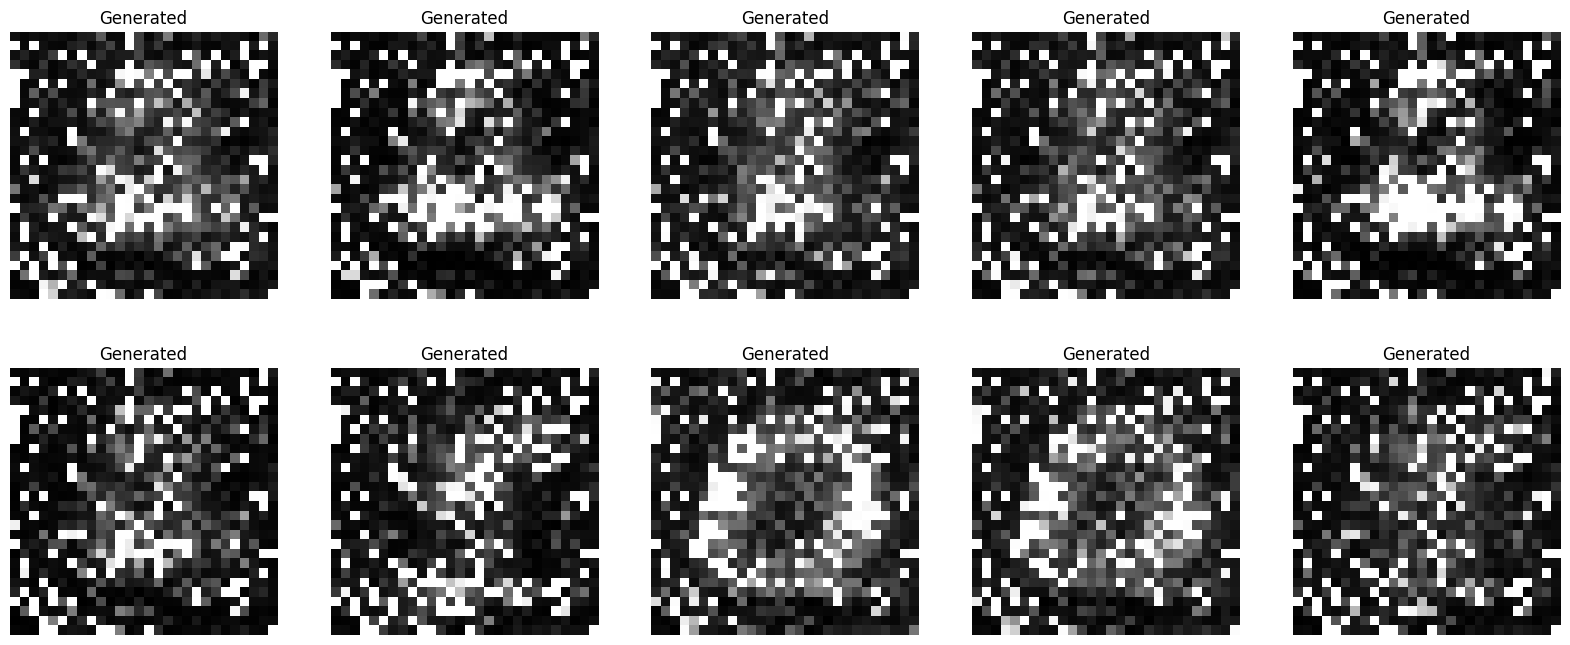

Epoch [26/100]
Loss D 0.0078
Loss G 5.9426


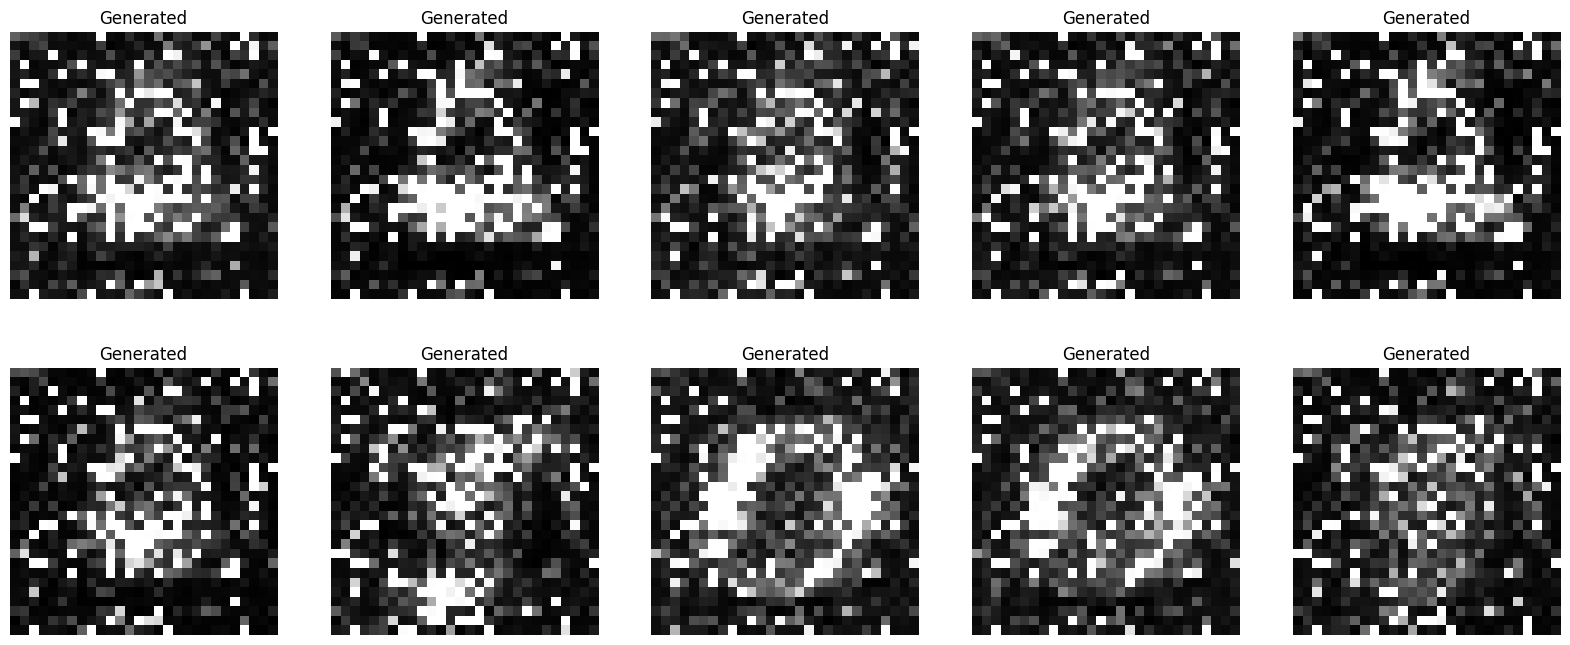

Epoch [27/100]
Loss D 0.0100
Loss G 5.6160


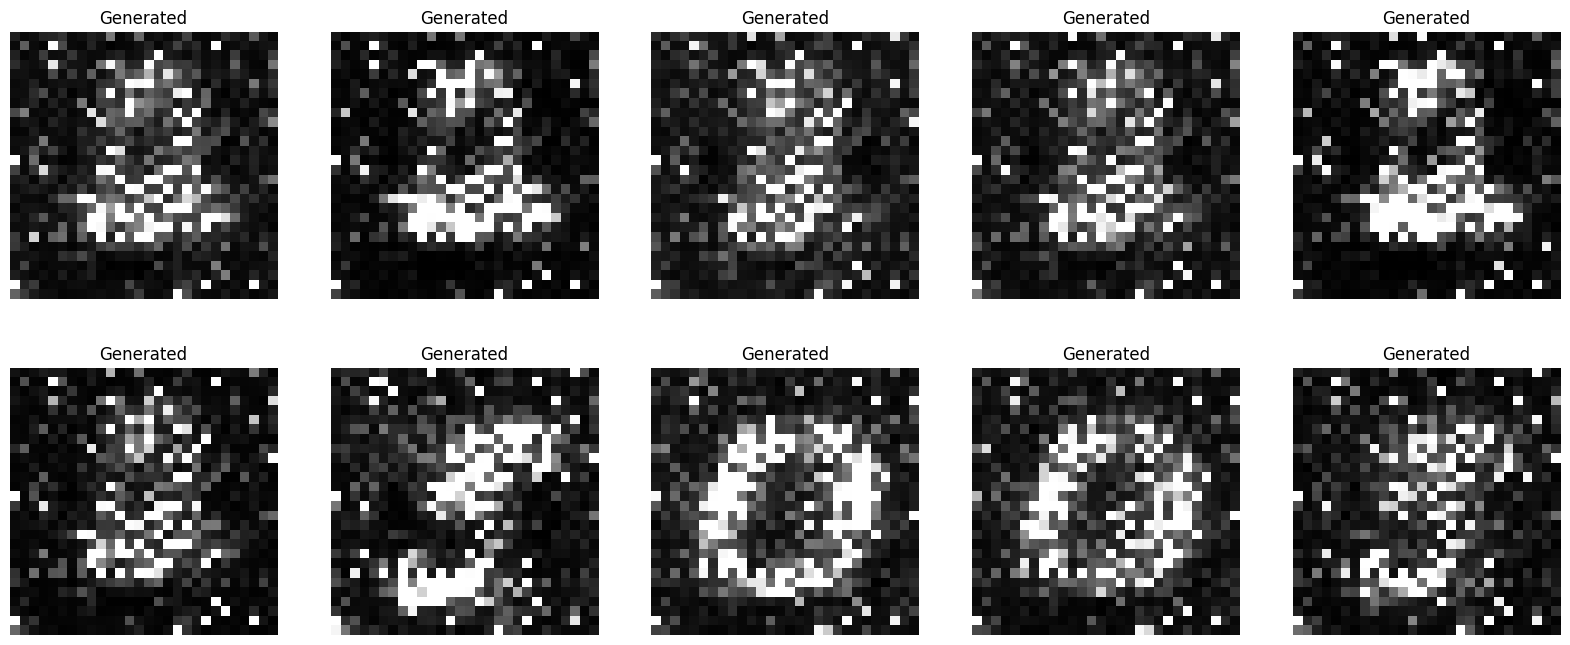

Epoch [28/100]
Loss D 0.0253
Loss G 4.8889


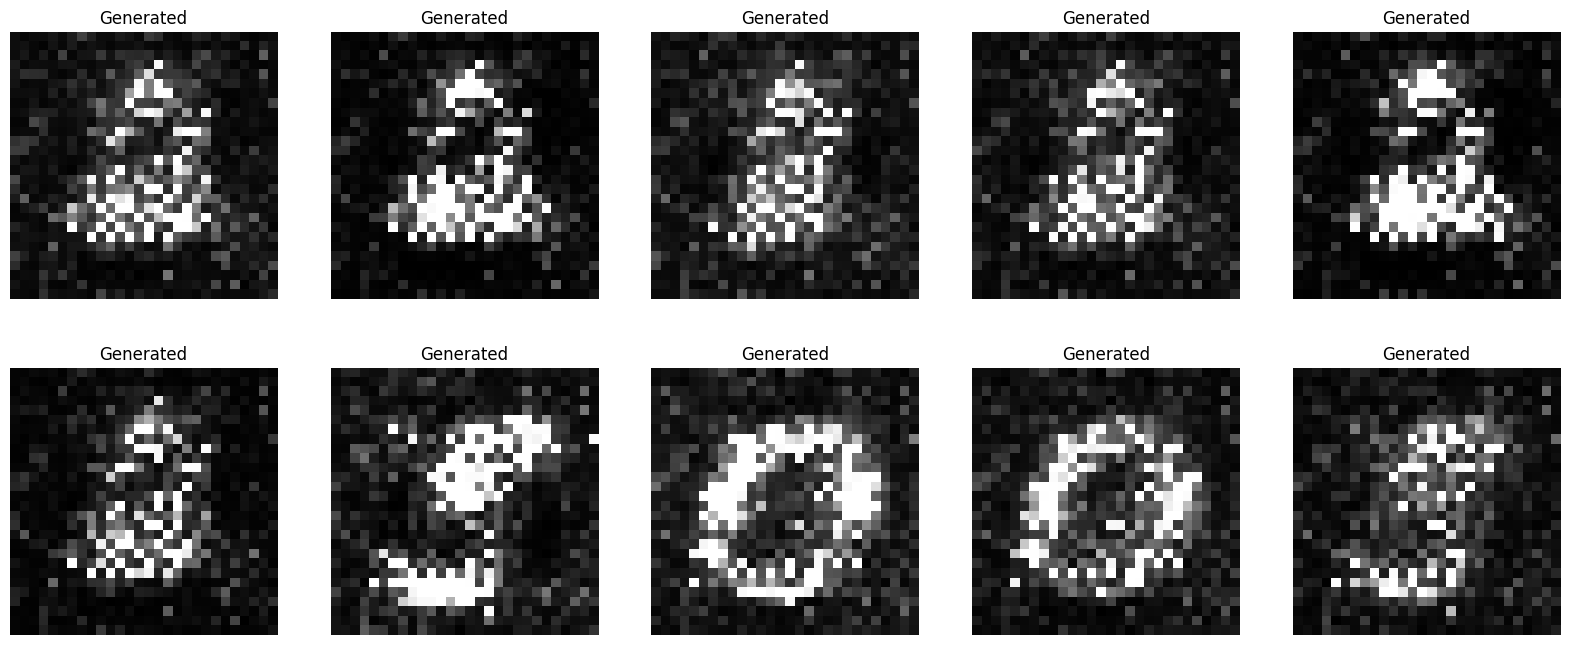

Epoch [29/100]
Loss D 0.0515
Loss G 4.1669


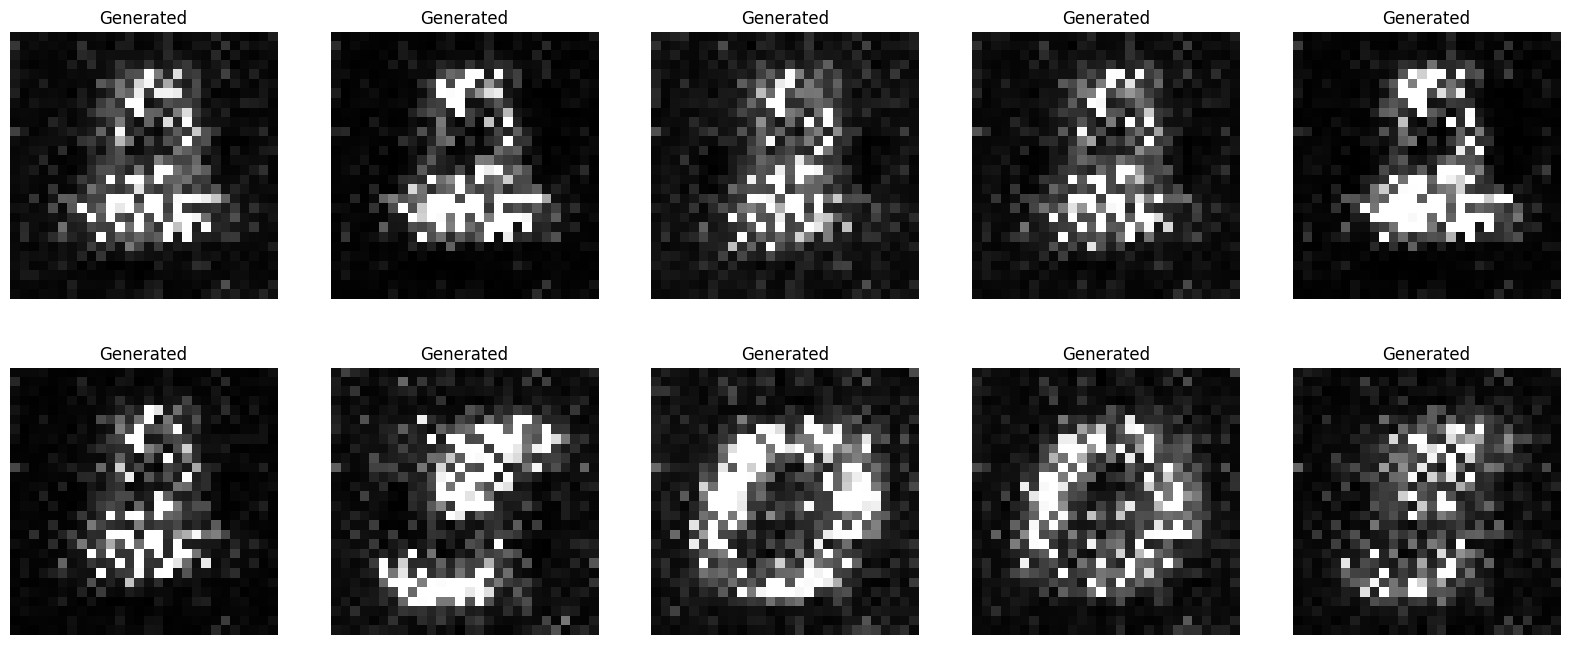

Epoch [30/100]
Loss D 0.0627
Loss G 3.4883


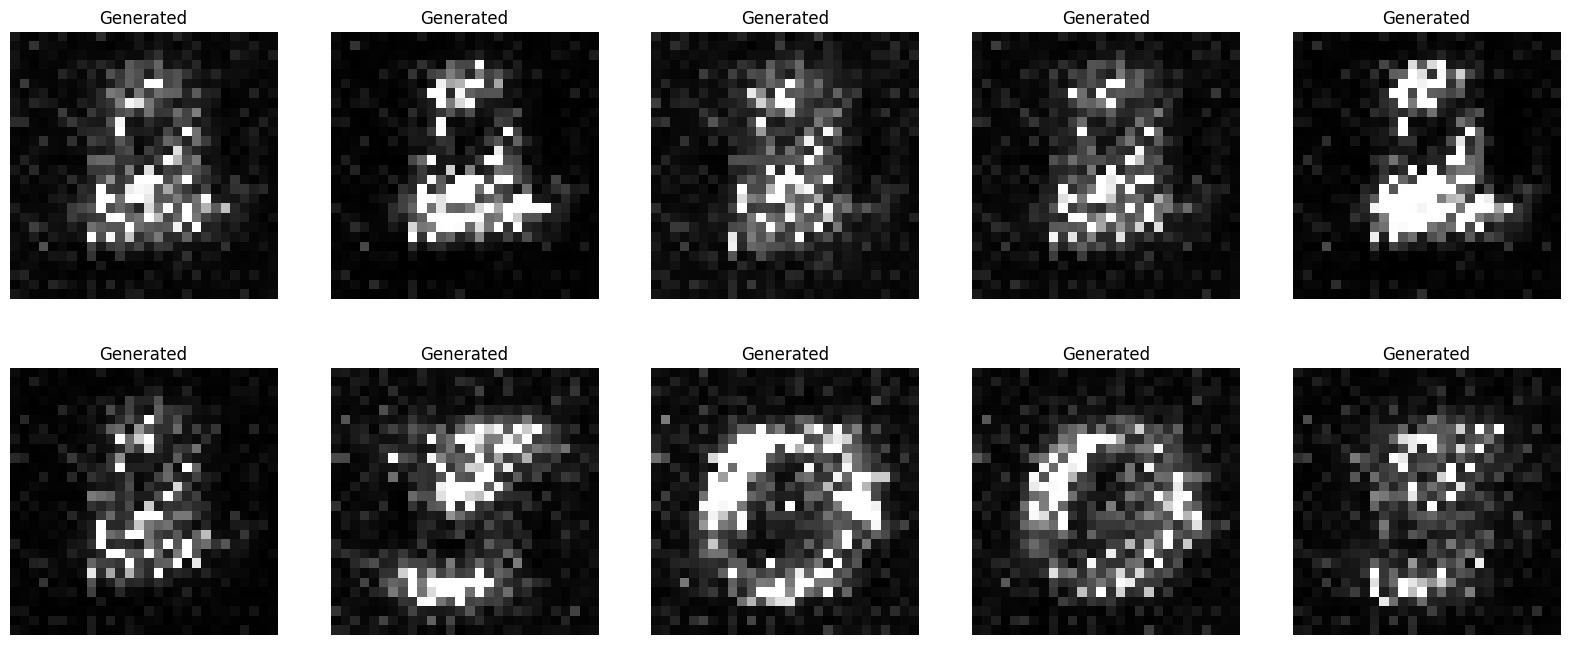

Epoch [31/100]
Loss D 0.1107
Loss G 3.2149


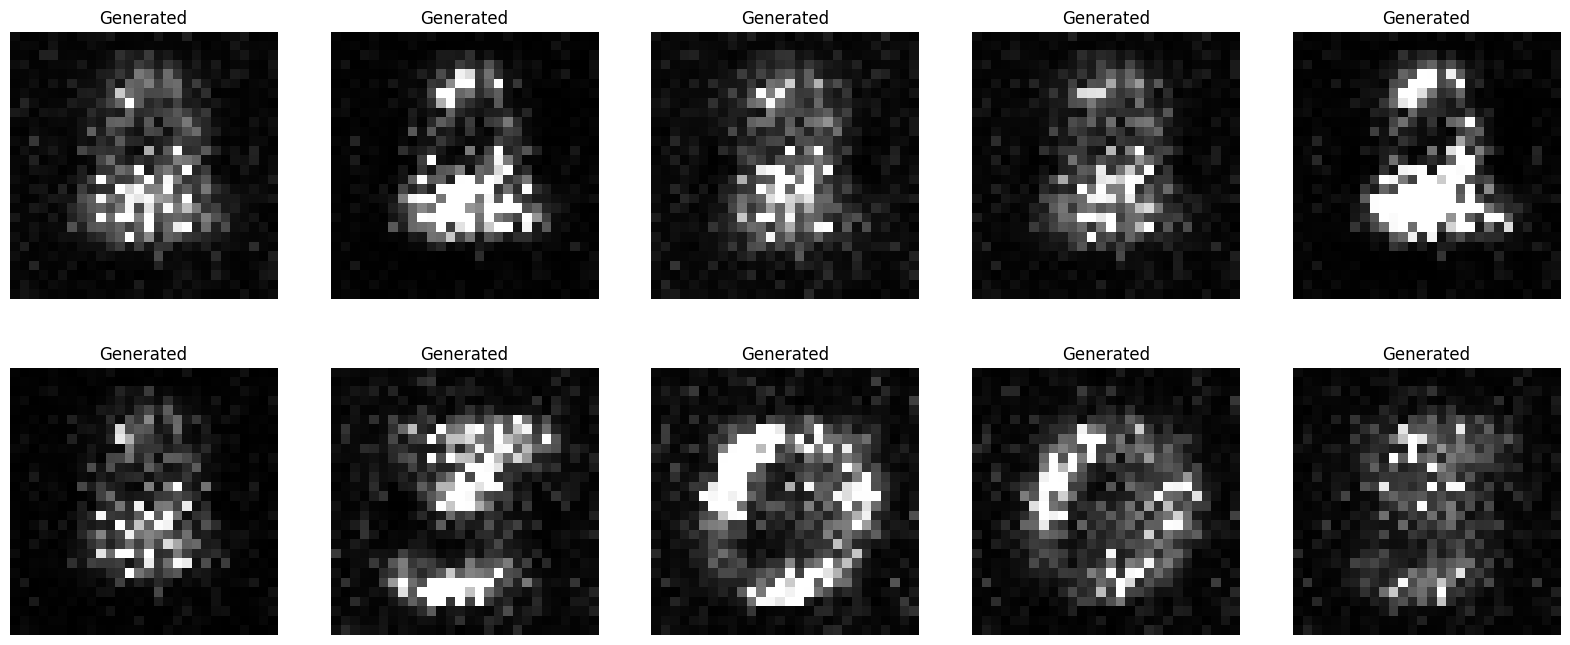

Epoch [32/100]
Loss D 0.1501
Loss G 2.6219


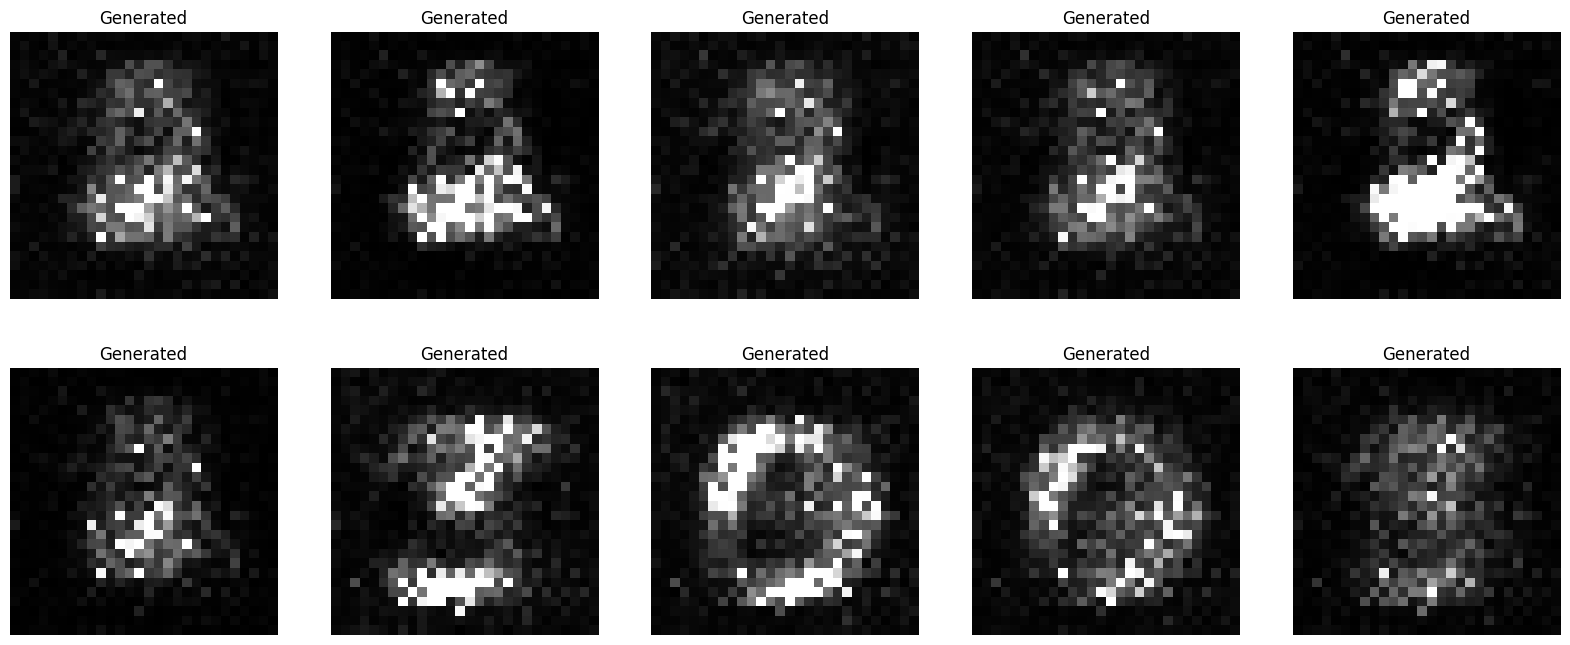

Epoch [33/100]
Loss D 0.1561
Loss G 2.6870


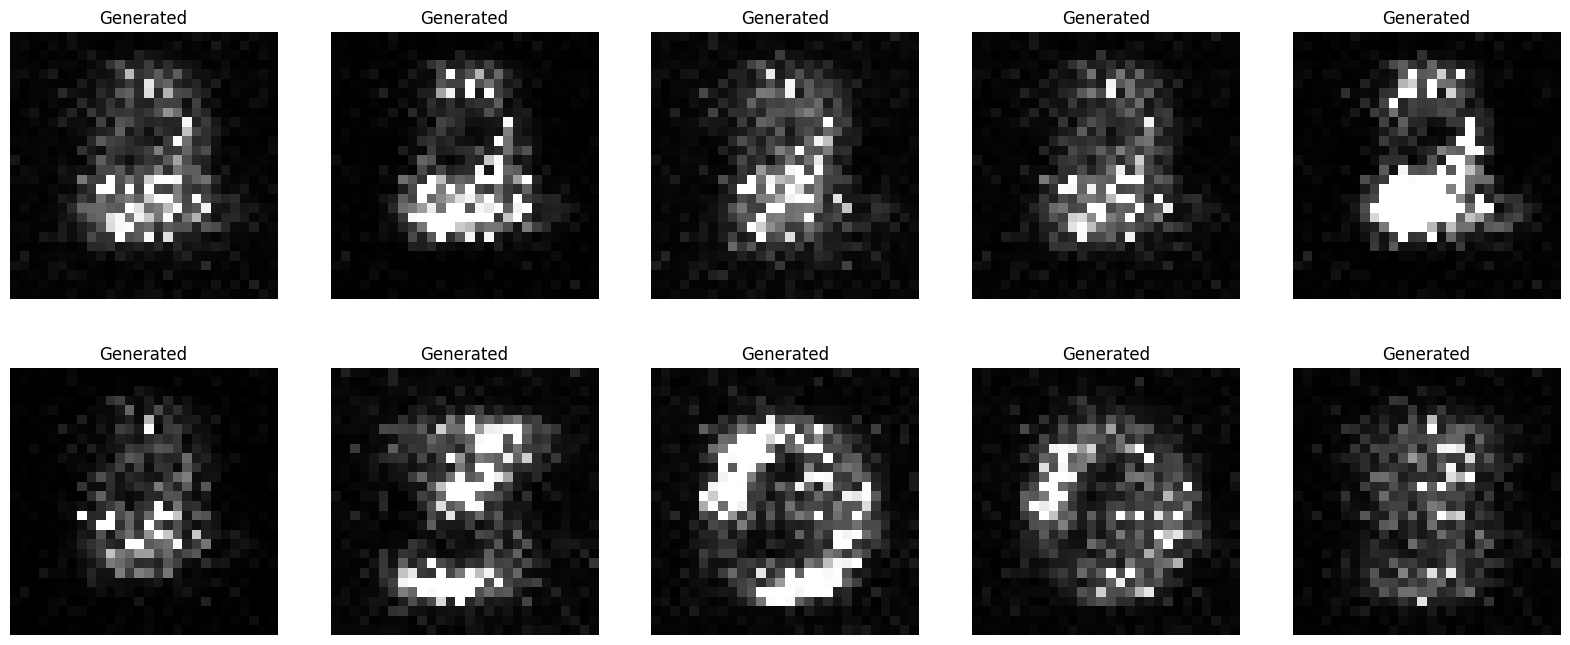

Epoch [34/100]
Loss D 0.1460
Loss G 3.0297


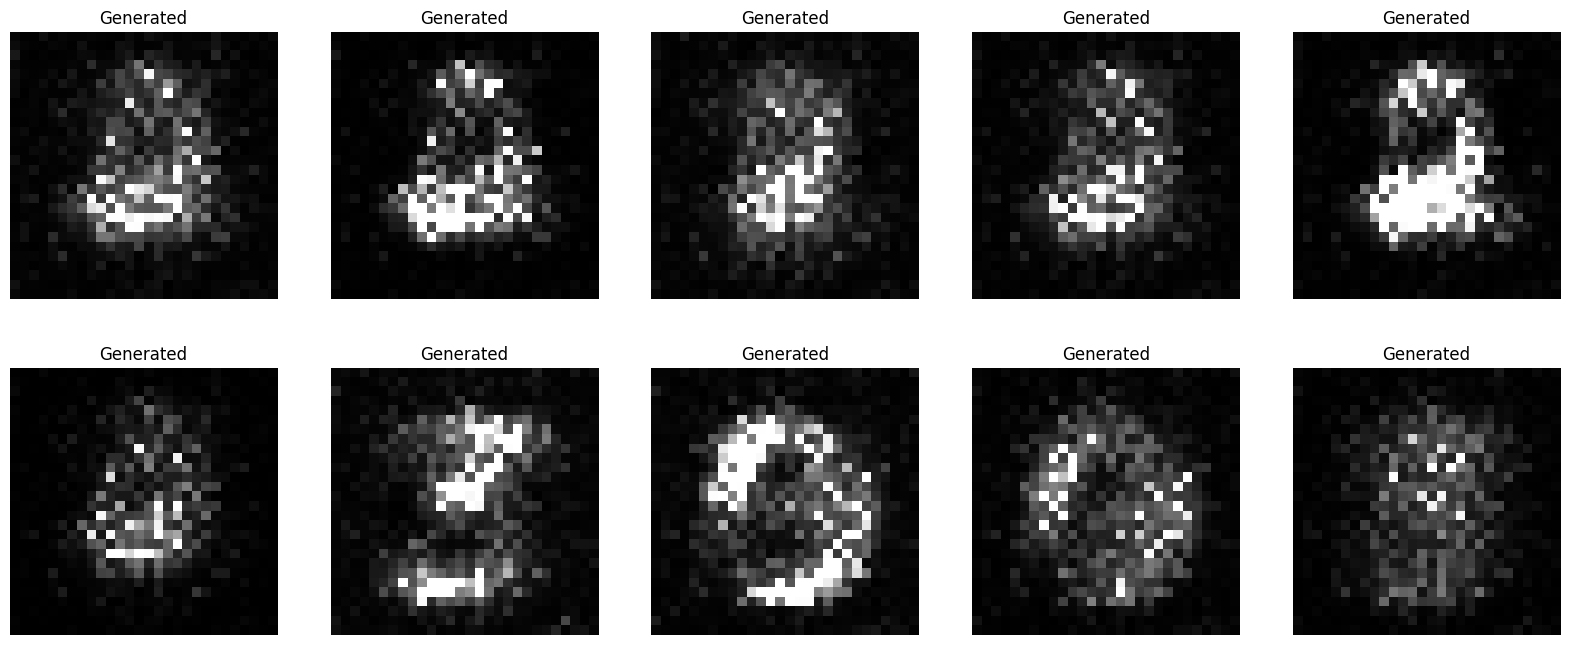

Epoch [35/100]
Loss D 0.1308
Loss G 2.7389


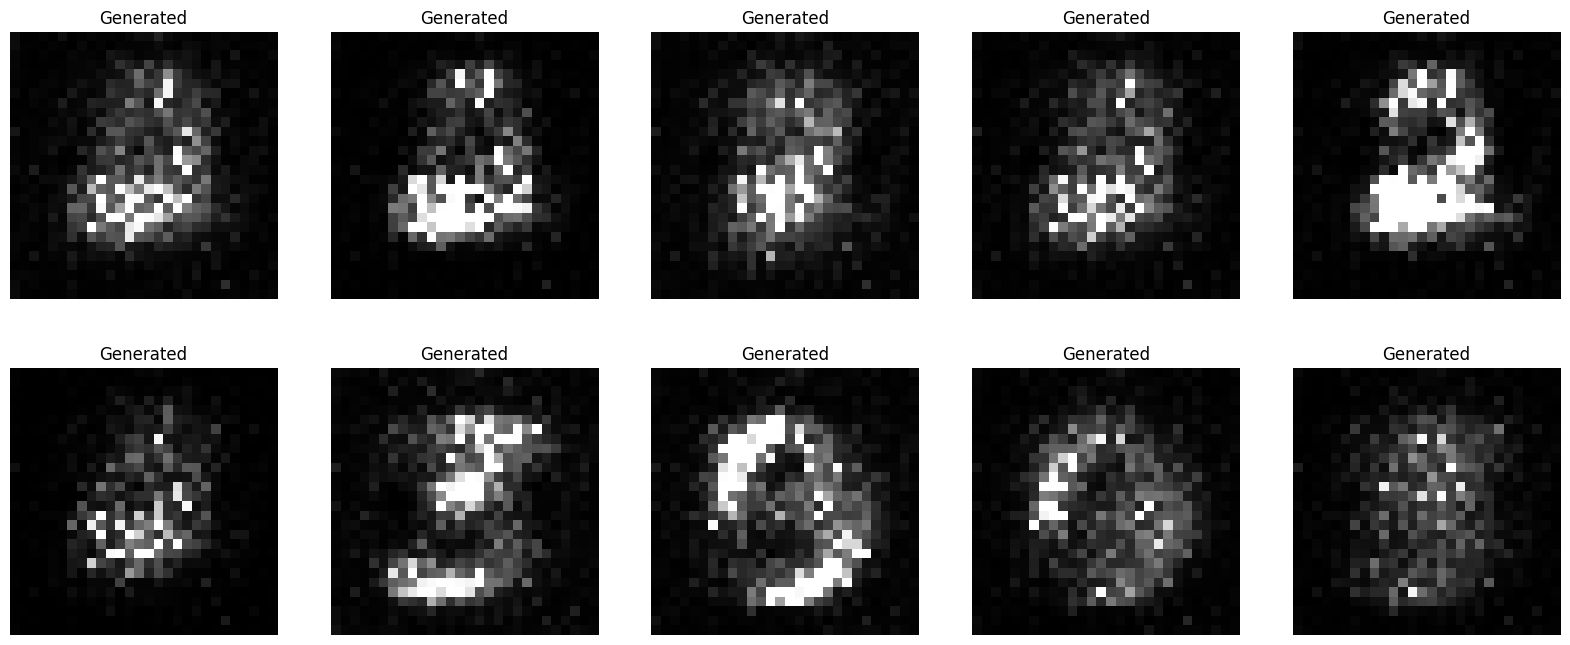

Epoch [36/100]
Loss D 0.1599
Loss G 2.6119


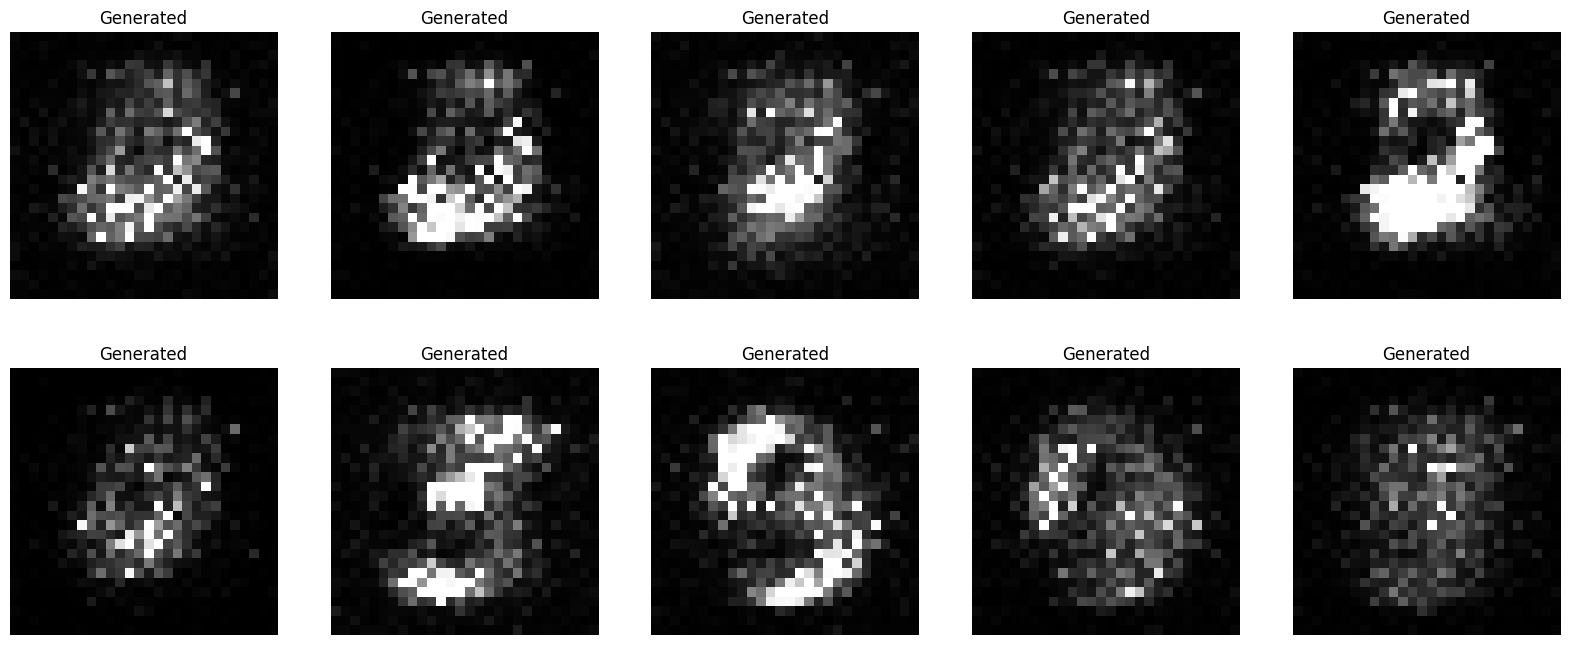

Epoch [37/100]
Loss D 0.2139
Loss G 2.6877


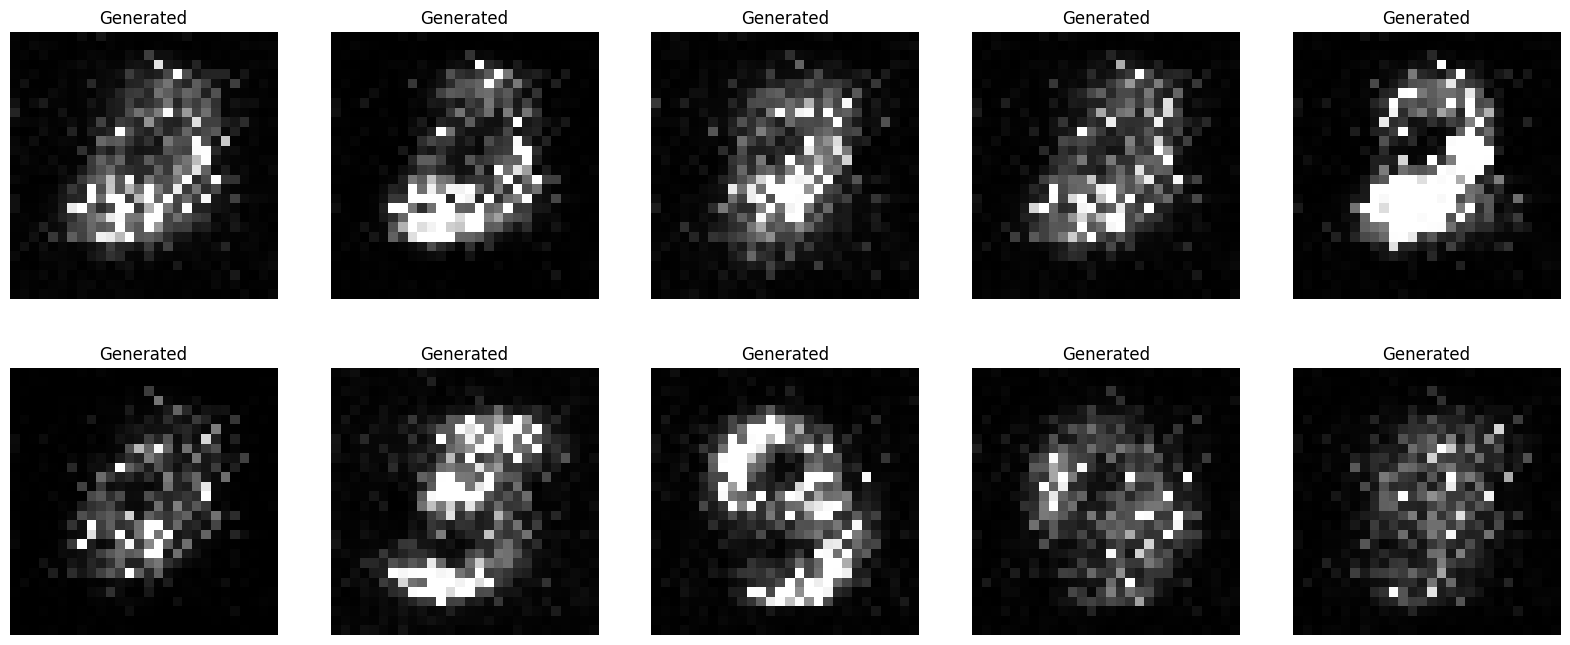

Epoch [38/100]
Loss D 0.3385
Loss G 2.5556


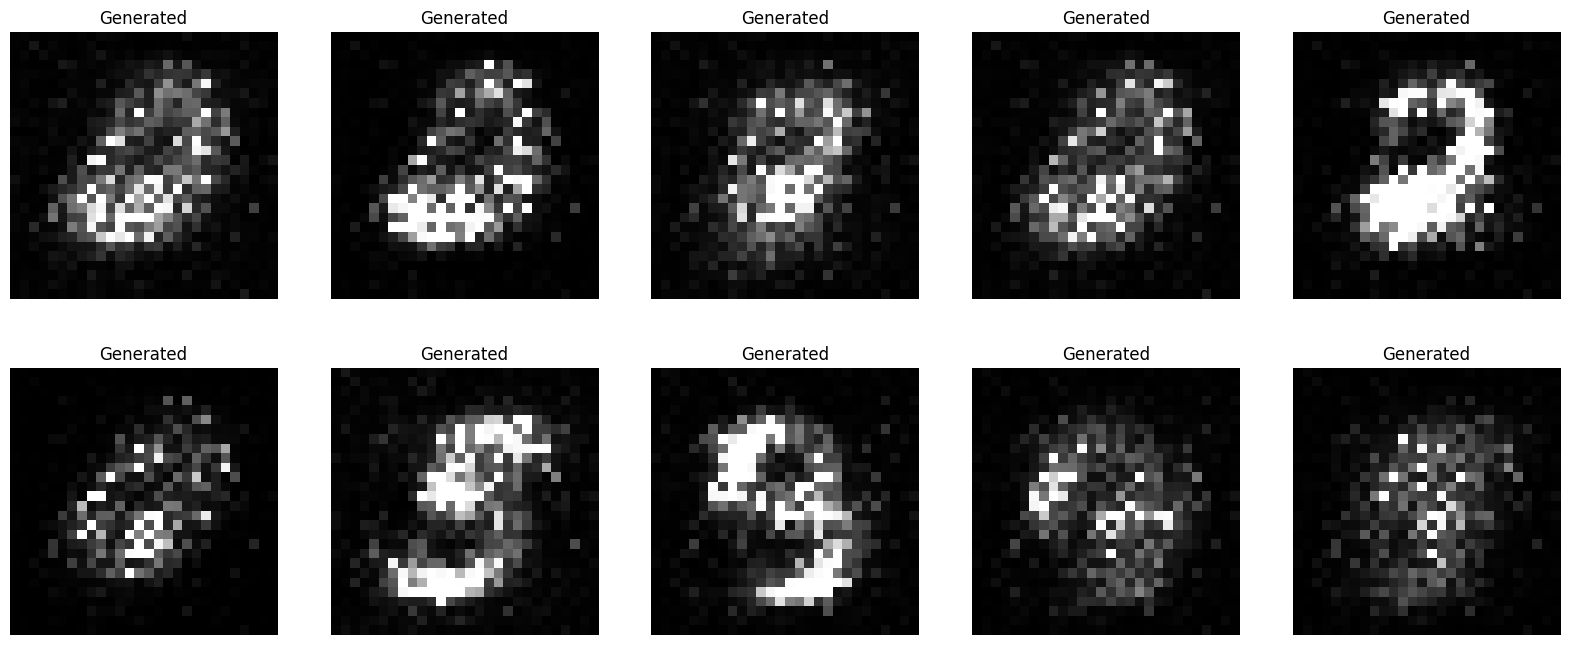

Epoch [39/100]
Loss D 0.3329
Loss G 2.0502


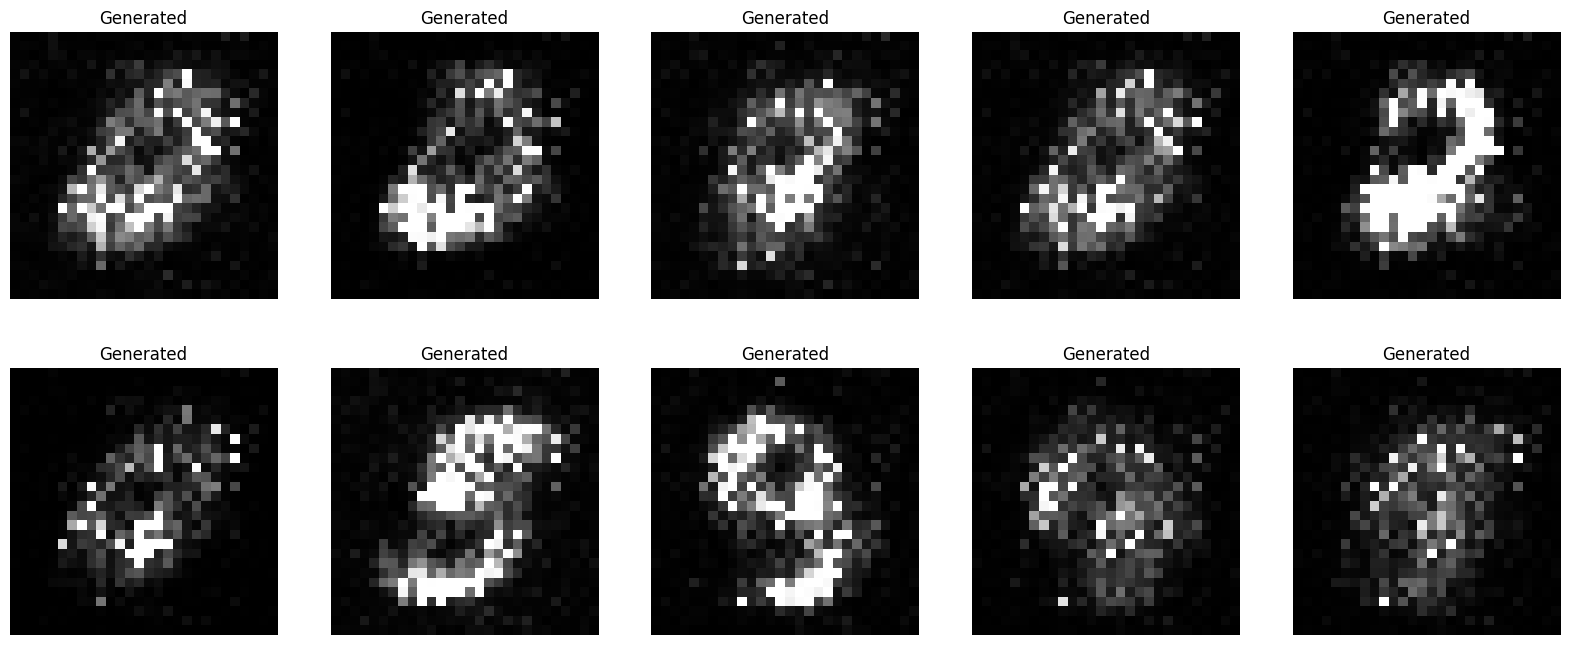

Epoch [40/100]
Loss D 0.3495
Loss G 2.0112


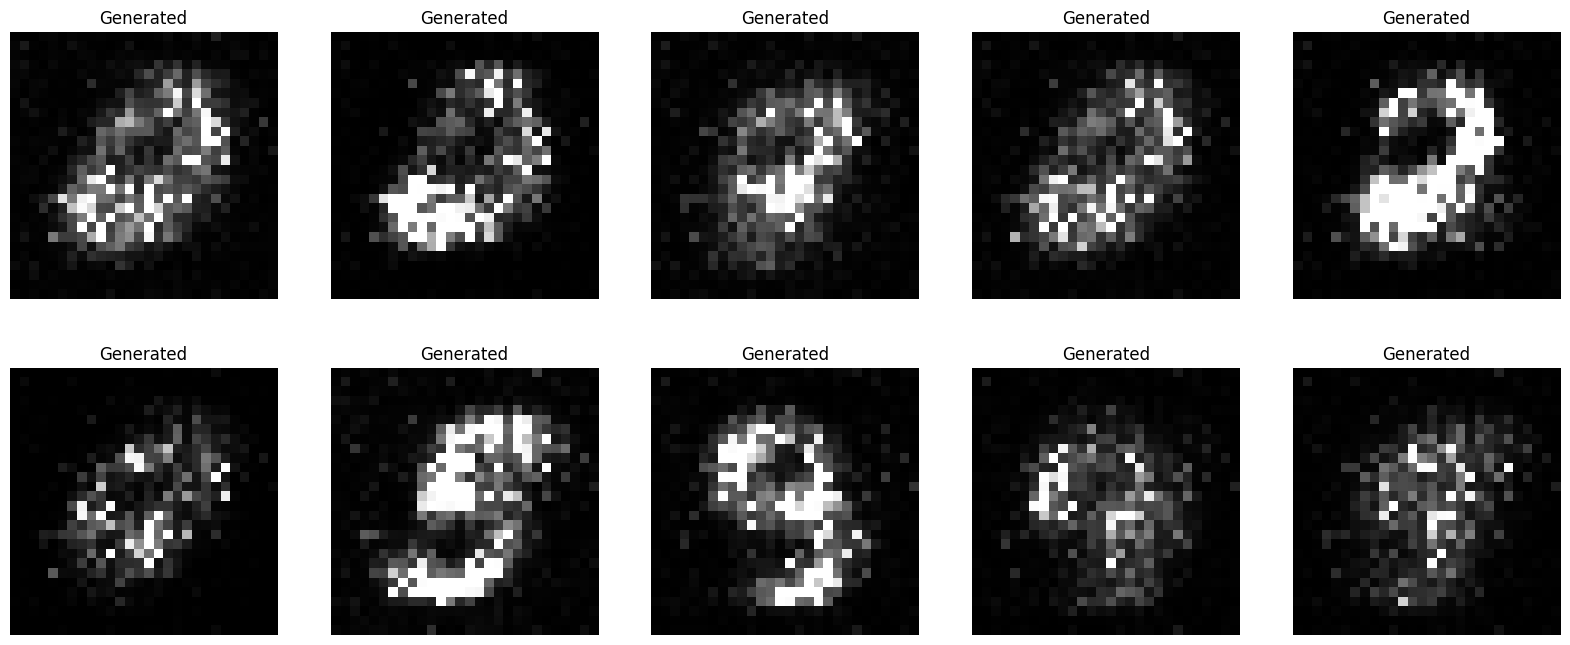

Epoch [41/100]
Loss D 0.3074
Loss G 2.0517


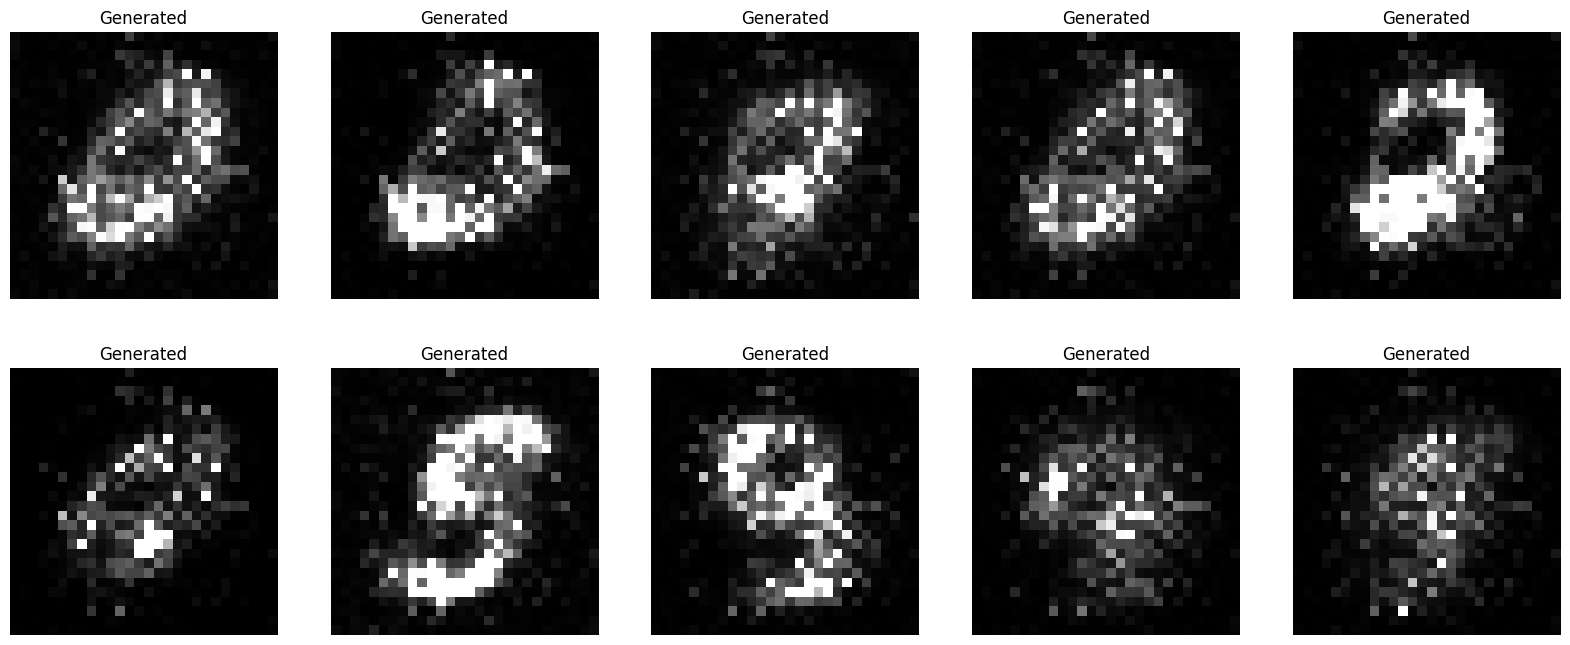

Epoch [42/100]
Loss D 0.4233
Loss G 1.7286


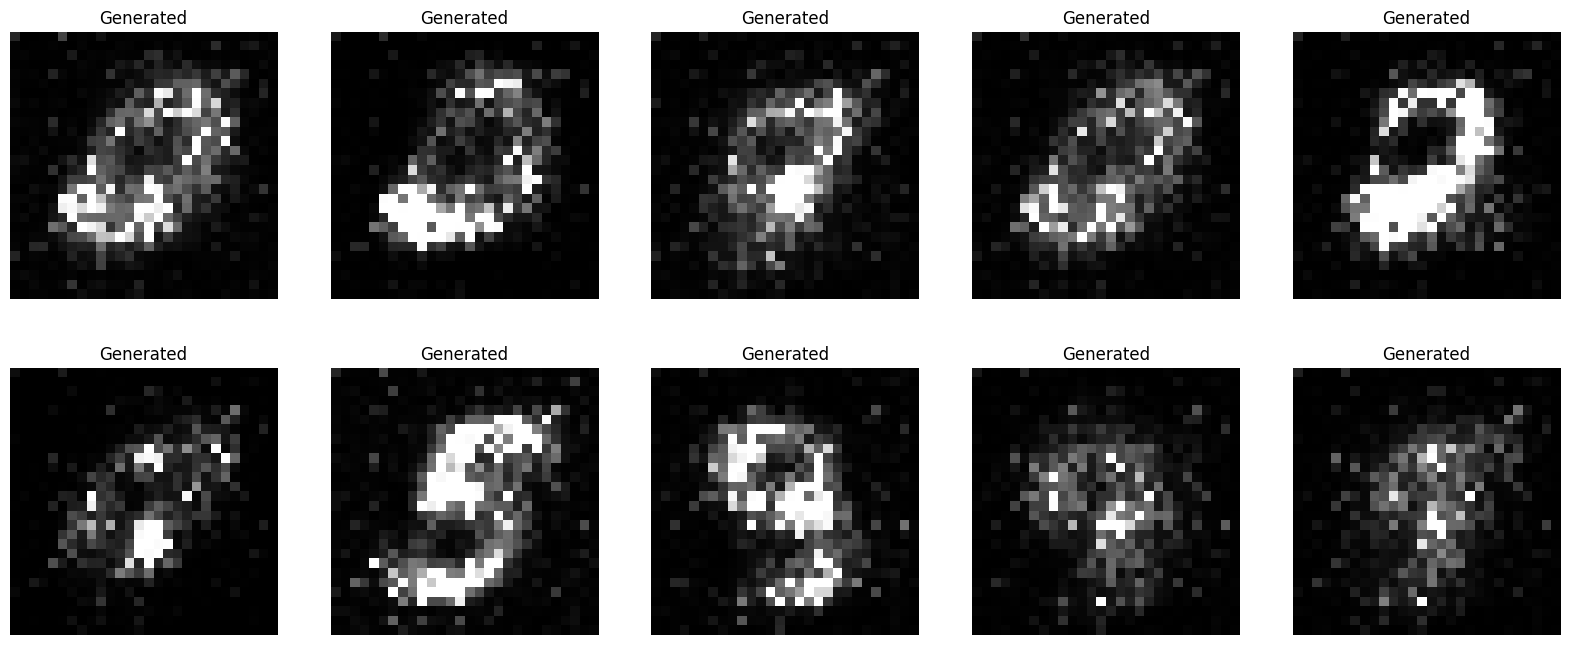

Epoch [43/100]
Loss D 0.3911
Loss G 1.7281


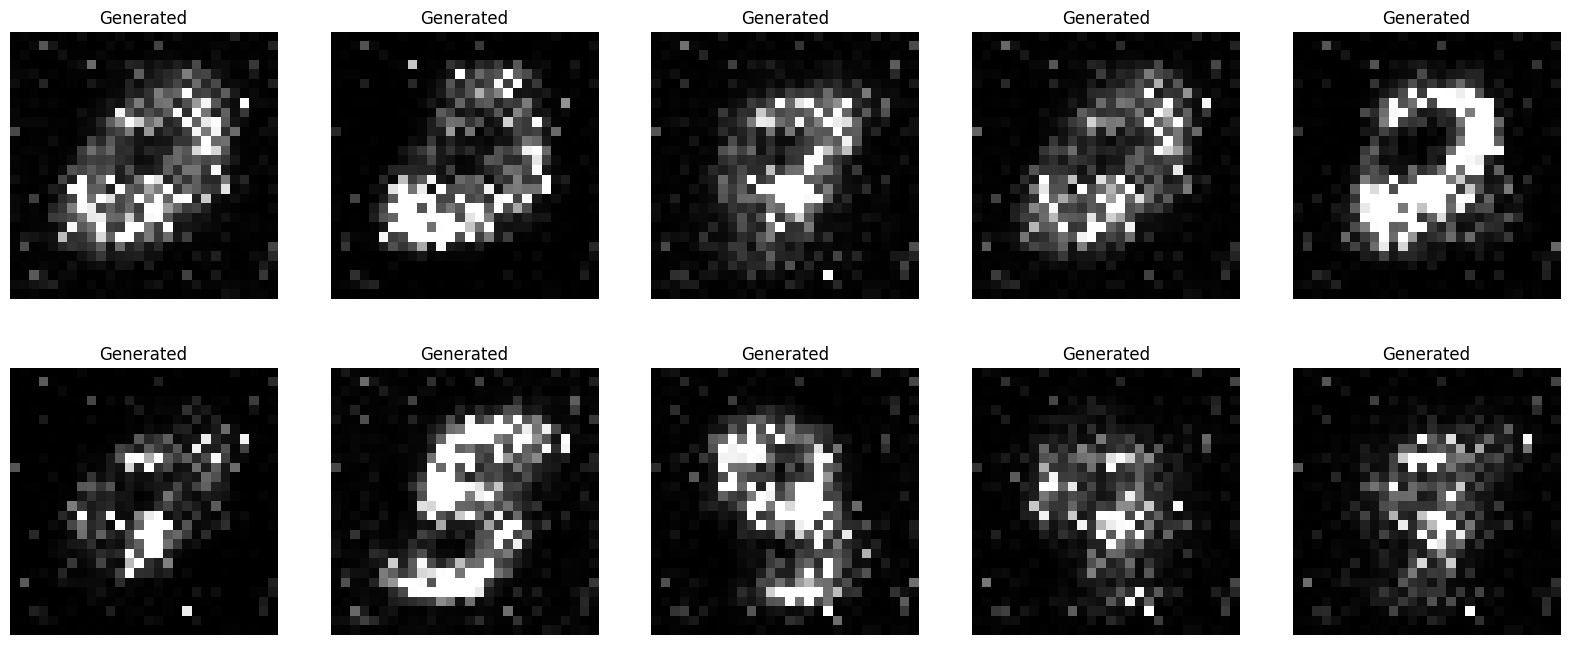

Epoch [44/100]
Loss D 0.2759
Loss G 2.3638


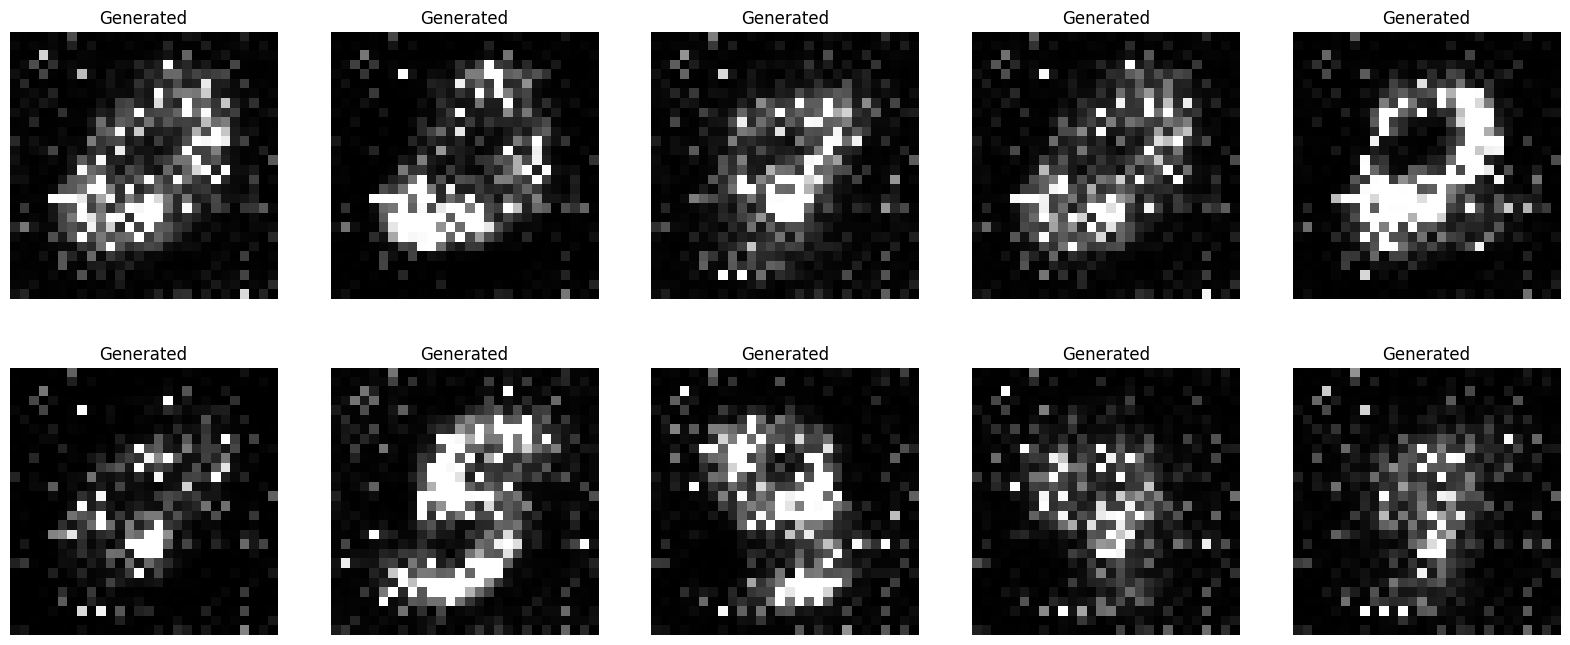

Epoch [45/100]
Loss D 0.0870
Loss G 3.3277


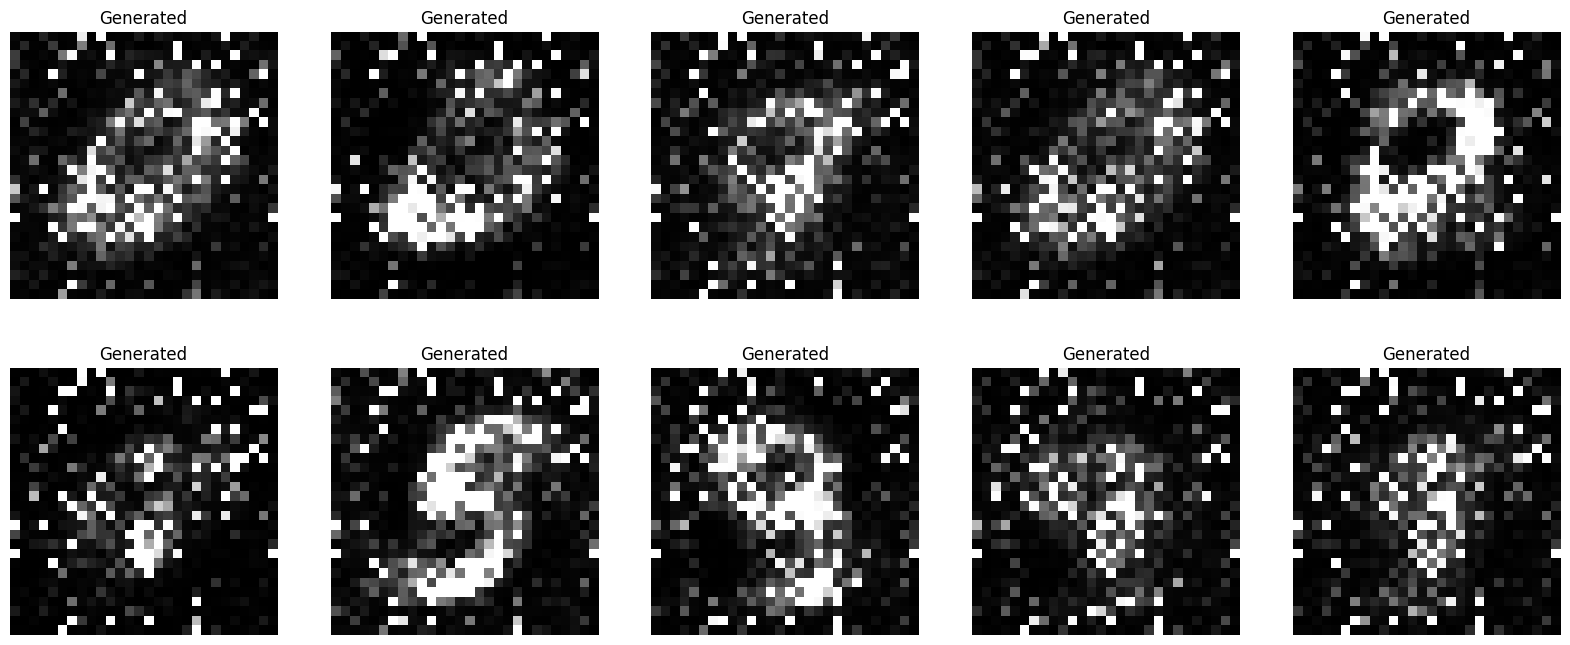

Epoch [46/100]
Loss D 0.0397
Loss G 4.5142


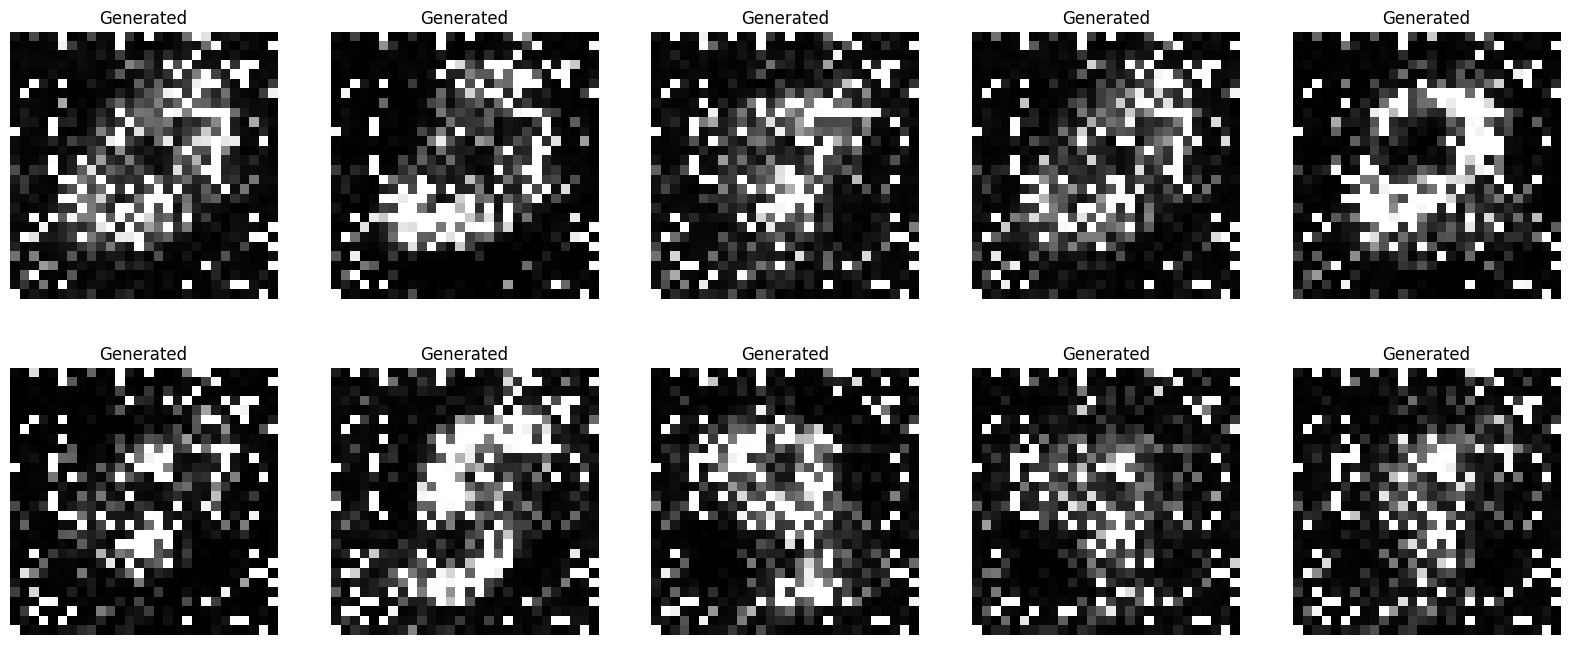

Epoch [47/100]
Loss D 0.0410
Loss G 4.4473


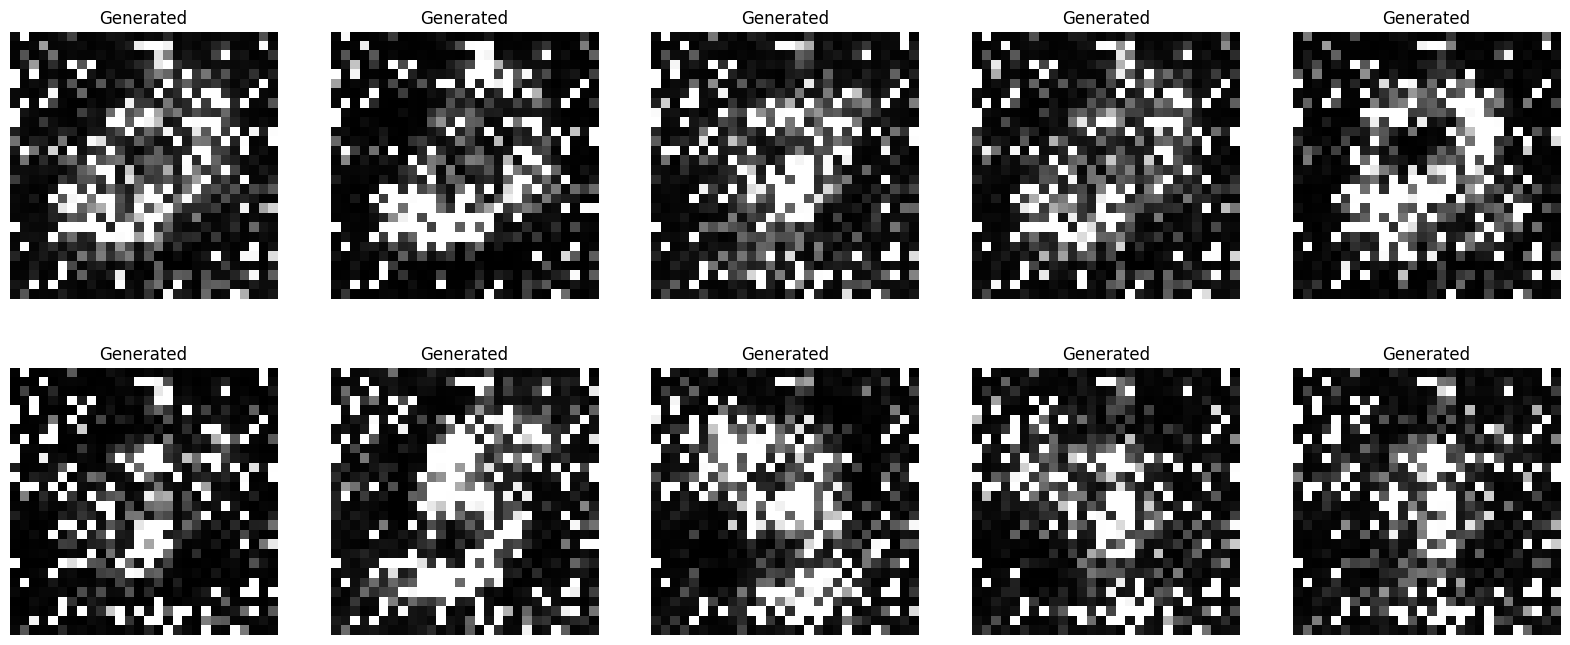

Epoch [48/100]
Loss D 0.0211
Loss G 4.5255


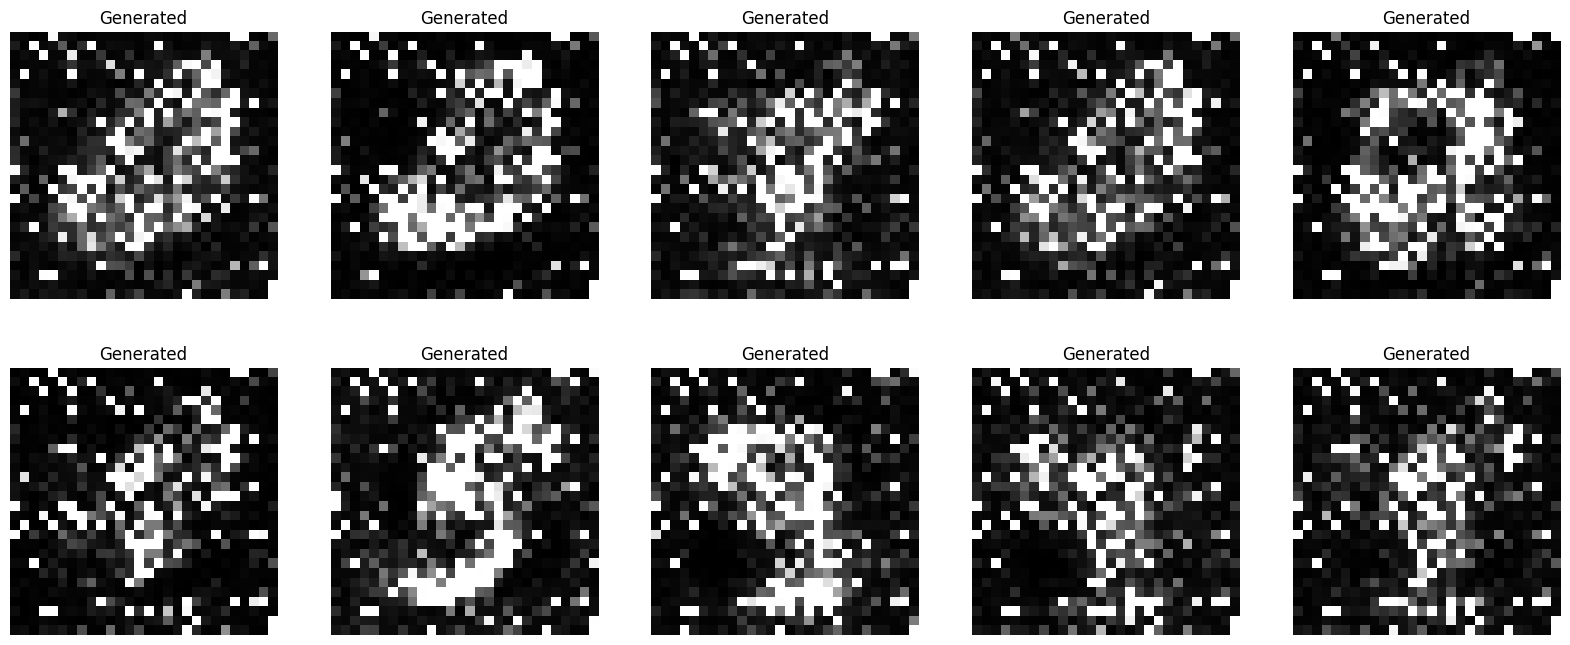

Epoch [49/100]
Loss D 0.0340
Loss G 4.3521


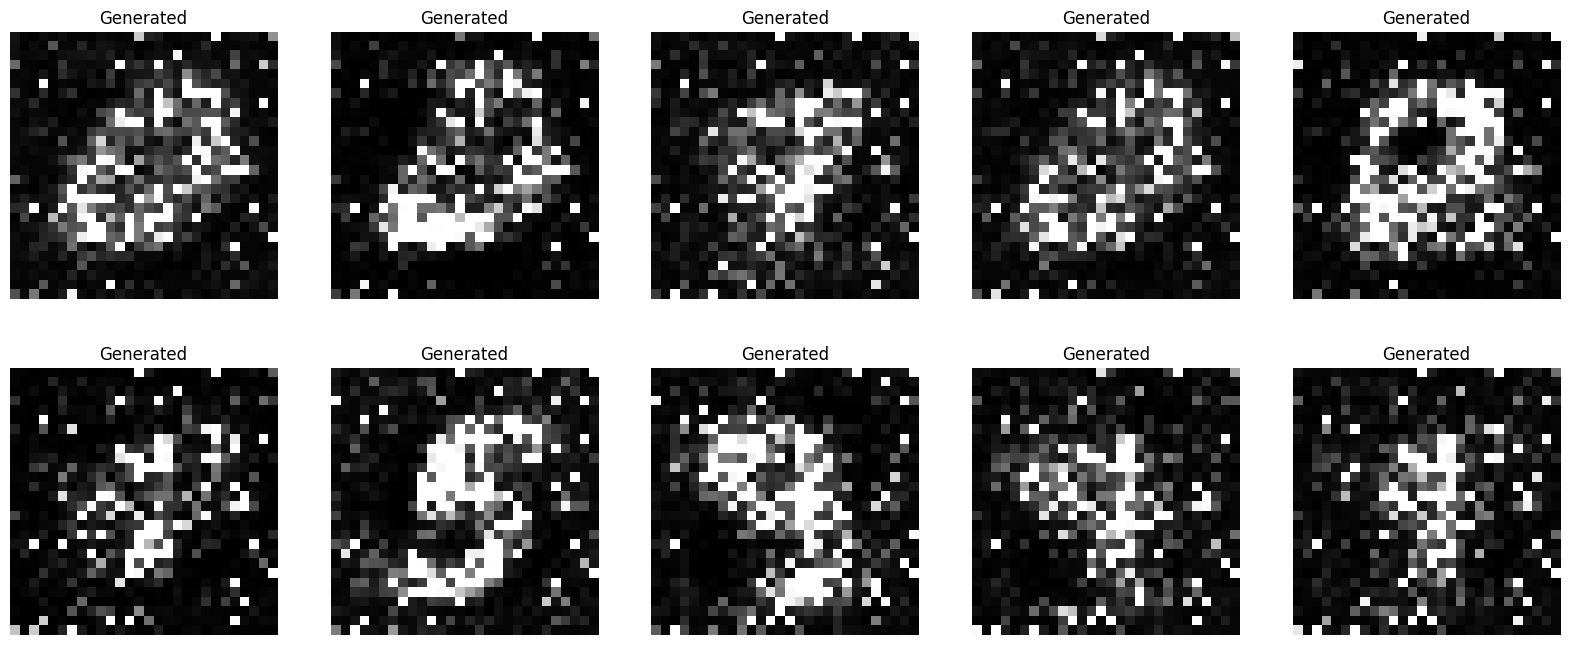

Epoch [50/100]
Loss D 0.0439
Loss G 4.4370


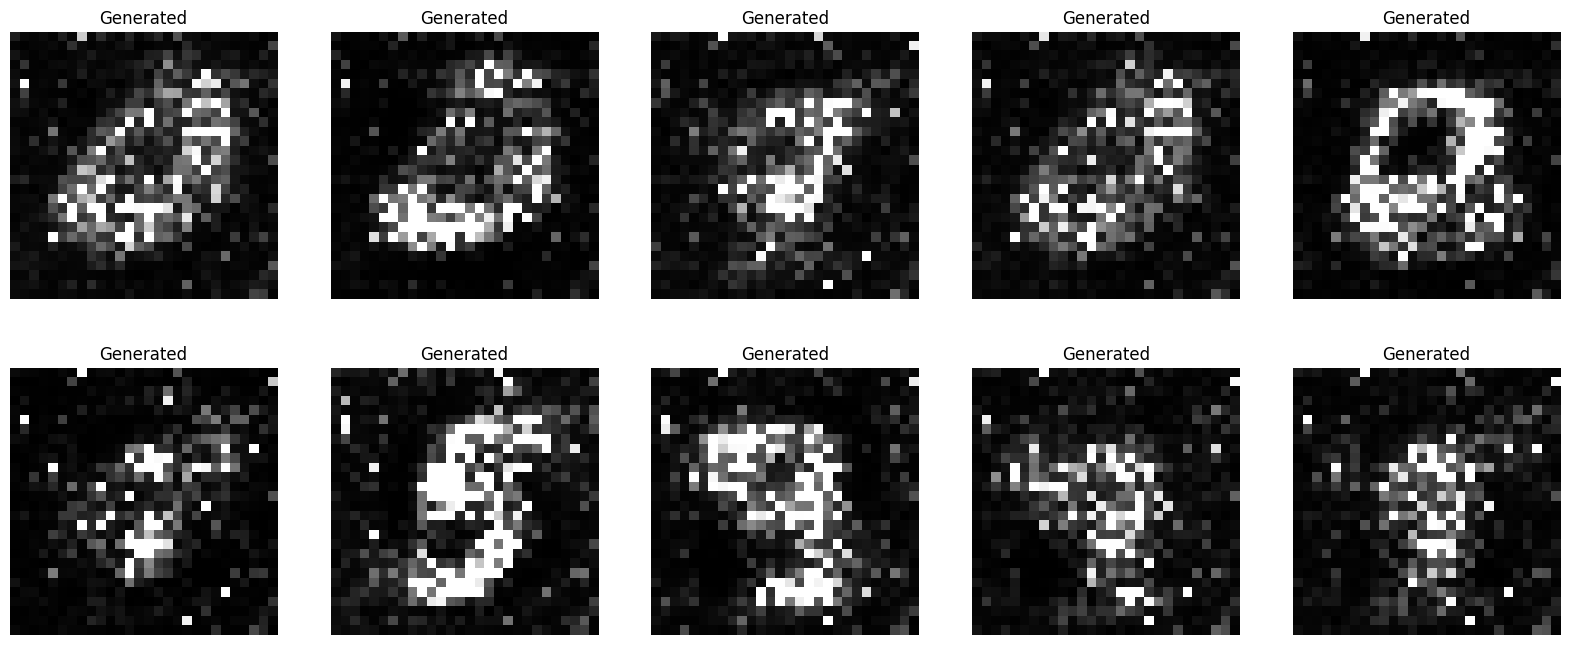

KeyboardInterrupt: 

In [58]:
fixed_noise = torch.randn(batch_size, z_dim).to(device)
for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.view(-1, 784).to(device)
        batch_size = real.shape[0]
        
        ### Train Discriminator: max log(D(real)) + log(1-D(G(z))
        noise = torch.randn(batch_size, z_dim).to(device)
        fake = gen(noise)
        disc_real = disc(real).view(-1)
        lossD_real = criterion(disc_real, torch.ones_like(disc_real))
        disc_fake = disc(fake).view(-1)
        lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
        lossD = (lossD_real + lossD_fake) / 2
        disc.zero_grad()
        lossD.backward(retain_graph=True)
        opt_disc.step()
        
        ### Train Generator min log(1-D(G(z))) <-> max log(D(G(z)))
        output = disc(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()
        
        
    print(f"Epoch [{epoch+1}/{num_epochs}]\nLoss D {lossD:.4f}\nLoss G {lossG:.4f}")
    real = real.view(-1, 1, 28, 28)
    with torch.no_grad():
        fake = gen(fixed_noise)
    fake = fake.view(-1, 1, 28, 28)

            # Display 10 images
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    for i in range(10):
        axes[i // 5, i % 5].imshow(torch.mean(fake, dim=1).detach().cpu().numpy()[i], cmap='gray')
        axes[i // 5, i % 5].set_title('Generated')
        axes[i // 5, i % 5].axis('off')

    plt.pause(0.01)
    plt.show()